# Data Exploration

## Initialize Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

In [3]:
# plot defaults
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Target Variable Analysis

Our target variable is the expected loss per policy normalized by exposure: Expected Loss = Claim Cost (claimcst0) / Exposure

In [4]:
model_data = pd.read_csv('../backend/model_data_cleaned.csv')
inference_data = pd.read_csv('../backend/inference_data_cleaned.csv')

In [5]:
model_data.head()

,id,fold,sample,veh_value,exposure,veh_body,veh_age,gender,area,agecat,...,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,low_education_ind,clm,numclaims,claimcst0,claim_cst_per_exposure
0,1,2,1|bld,5.80,0.362191,suv,2,f,b,1,...,0,weekday,12pm - 6pm,6,646.516469,0.0,1,1,2023.198184,5585.998969
1,2,3,1|bld,5.67,0.632068,stnwg,4,f,a,2,...,0,weekend,6am - 12pm,12,635.400369,0.0,1,1,3600.172234,5695.859540
2,3,1,1|bld,5.90,0.367460,sedan,2,f,c,2,...,0,weekday,6am - 12pm,12,646.463131,0.0,1,1,2021.144067,5500.307127
3,4,2,1|bld,4.79,0.802184,stnwg,3,m,b,4,...,1,weekday,6pm - 12am,12,645.598794,0.0,1,1,4006.845492,4994.920513
4,5,2,1|bld,6.68,0.485009,sedan,3,m,c,1,...,0,weekday,6am - 12pm,12,657.348612,0.0,1,1,2542.953931,5243.106060


In [12]:
model_data['expected_loss'] = model_data['claimcst0'] / model_data['exposure']
model_data['claim_sev'] = model_data.apply(
    lambda row: row['claimcst0'] / row['numclaims'] if row['numclaims'] != 0 else np.nan,
    axis=1
)

## Visualize Frequency & Severity of Claims

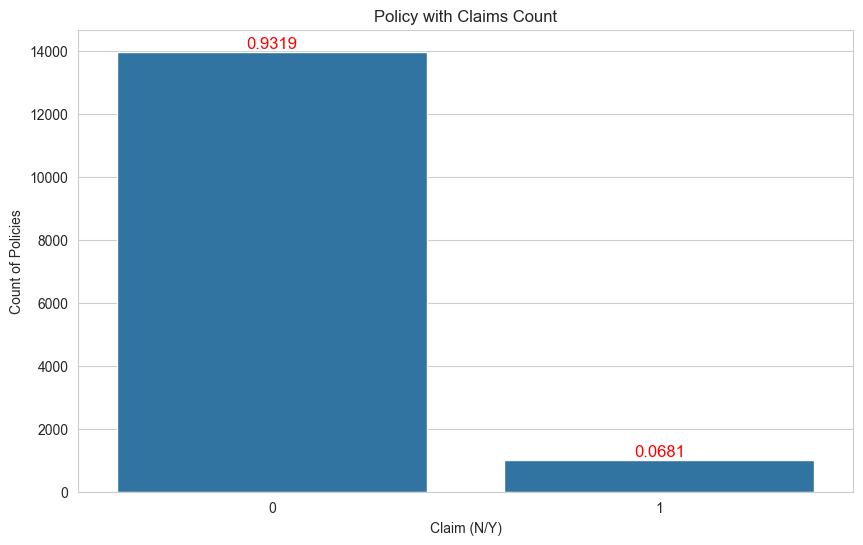

Base Claim Rate (Frequency): 6.81%


In [36]:
# Histogram of claim cost
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='clm', data=model_data)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1,
            f'{round(float(height/15000),4)}',
            ha='center', va='bottom', fontsize=12, color='red')
plt.title('Policy with Claims Count')
plt.xlabel('Claim (N/Y)')
plt.ylabel('Count of Policies')
plt.show()

claim_rate = model_data['clm'].mean()
print(f"Base Claim Rate (Frequency): {claim_rate:.2%}")


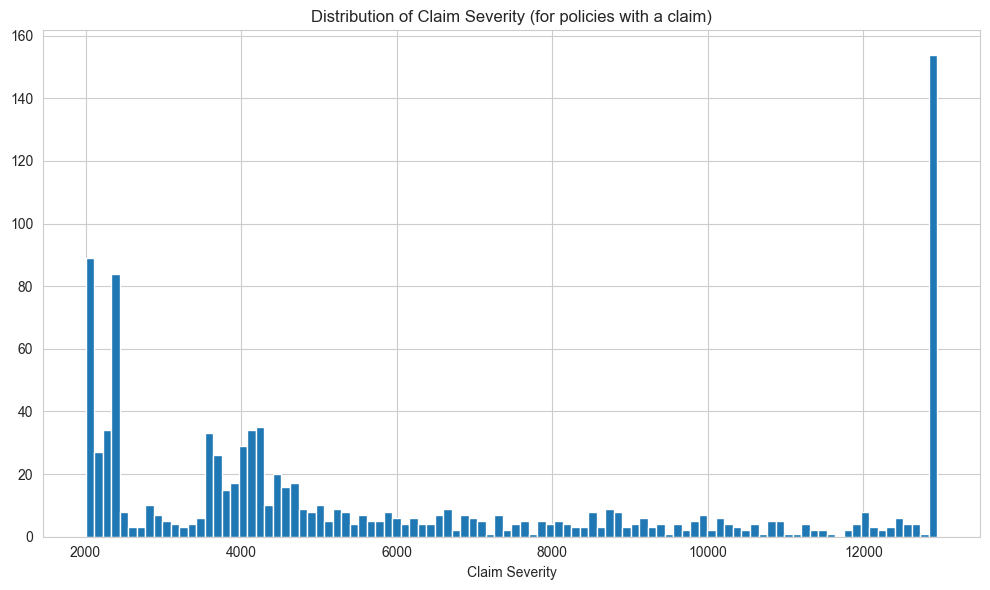

Average Claim Severity: 6239.949


In [18]:
# Analyze severity (cost given a claim happened)

plt.figure(figsize=(10, 6))
plt.hist(model_data['claim_sev'].dropna(), bins=100)
plt.title('Distribution of Claim Severity (for policies with a claim)')
plt.xlabel('Claim Severity')
plt.tight_layout()
plt.show()

avg_sev = model_data['claim_sev'].dropna().mean()

print(f"Average Claim Severity: {avg_sev:.3f}")

## Visualizing Predictors

In [21]:
# Identifying feature by type (numerical vs categorical)
num_features = [
    'exposure',
    'veh_value',
    'max_power',
    'driving_history_score',
    'credit_score'
]

cat_features = [
    'veh_age',
    'area',
    'veh_body',
    'gender',
    'agecat',
    'engine_type',
    'veh_color',
    'marital_status',
    'e_bill',
    'time_of_week_driven',
    'time_driven',
    'trm_len',
    'low_education_ind'
]

possible_target_features = [
    'clm',
    'numclaims',
    'claimcst0',
    'expected_loss'
]

# Make sure columns exist (no typos), redefine feature lists if a column not found
preds = [col for col in num_features + cat_features if col in model_data.columns]
features = [col for col in num_features + cat_features + possible_target_features if col in model_data.columns]
num_features = [col for col in num_features if col in model_data.columns]
cat_features = [col for col in cat_features if col in model_data.columns]
possible_target_features = [col for col in possible_target_features if col in model_data.columns]

print(f"Found {len(features)} total features: {features}")

Found 22 total features: ['exposure', 'veh_value', 'max_power', 'driving_history_score', 'credit_score', 'veh_age', 'area', 'veh_body', 'gender', 'agecat', 'engine_type', 'veh_color', 'marital_status', 'e_bill', 'time_of_week_driven', 'time_driven', 'trm_len', 'low_education_ind', 'clm', 'numclaims', 'claimcst0', 'expected_loss']


## Visualizing expected loss per exposure against each potential predictor


--- Predictiveness Plot for exposure ---


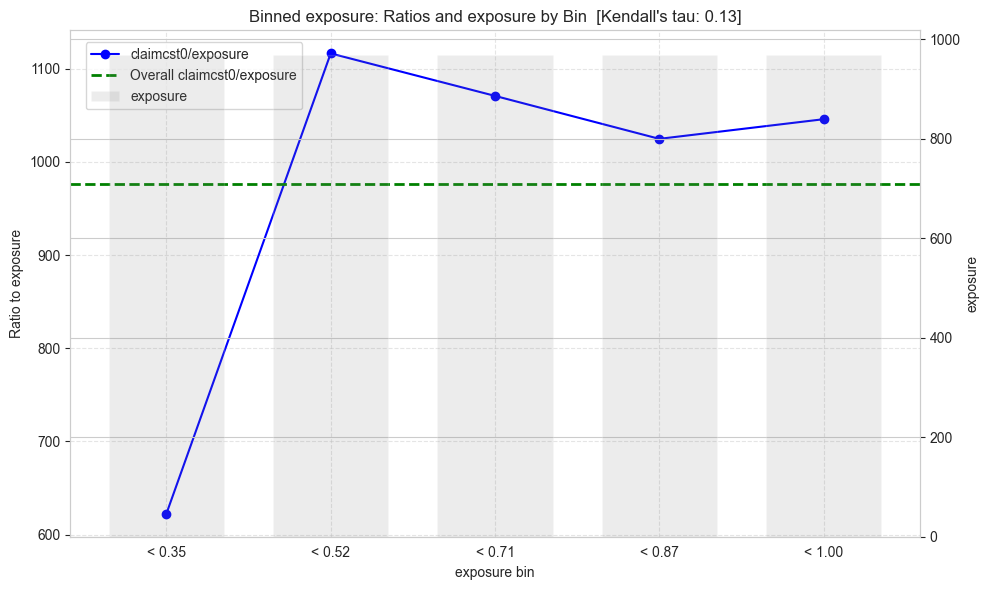


--- Predictiveness Plot for veh_value ---


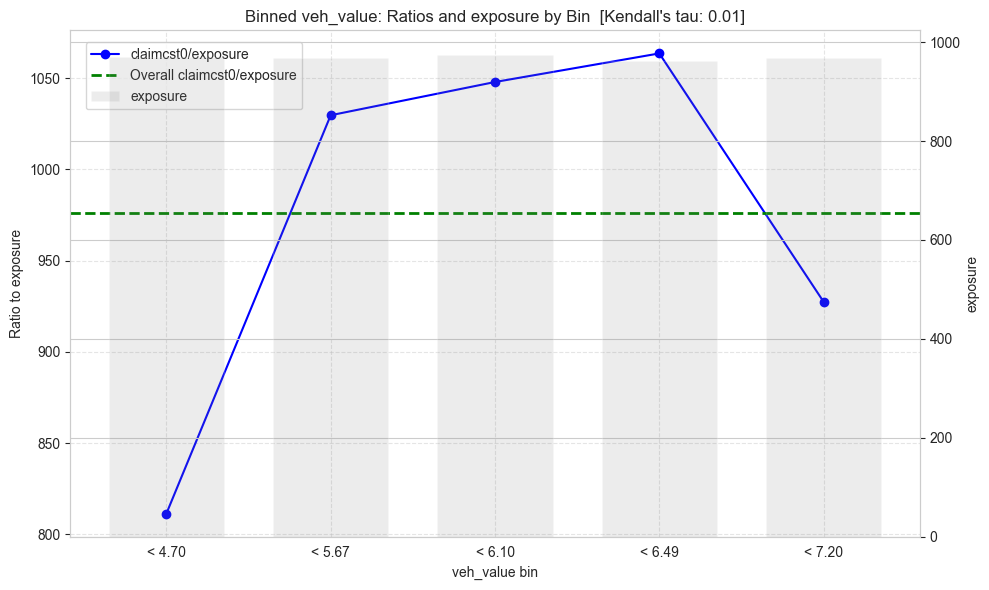


--- Predictiveness Plot for max_power ---


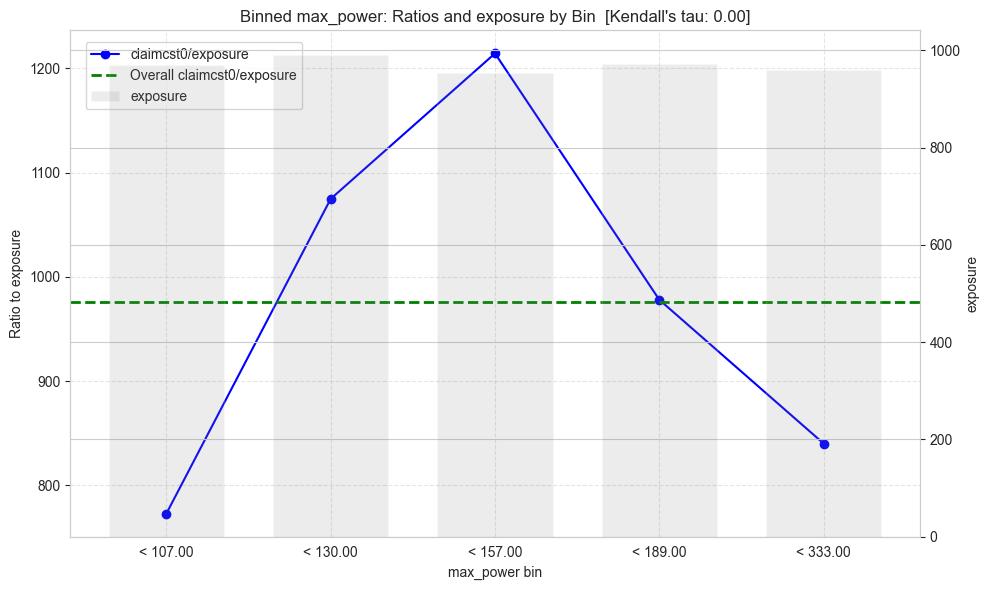


--- Predictiveness Plot for driving_history_score ---


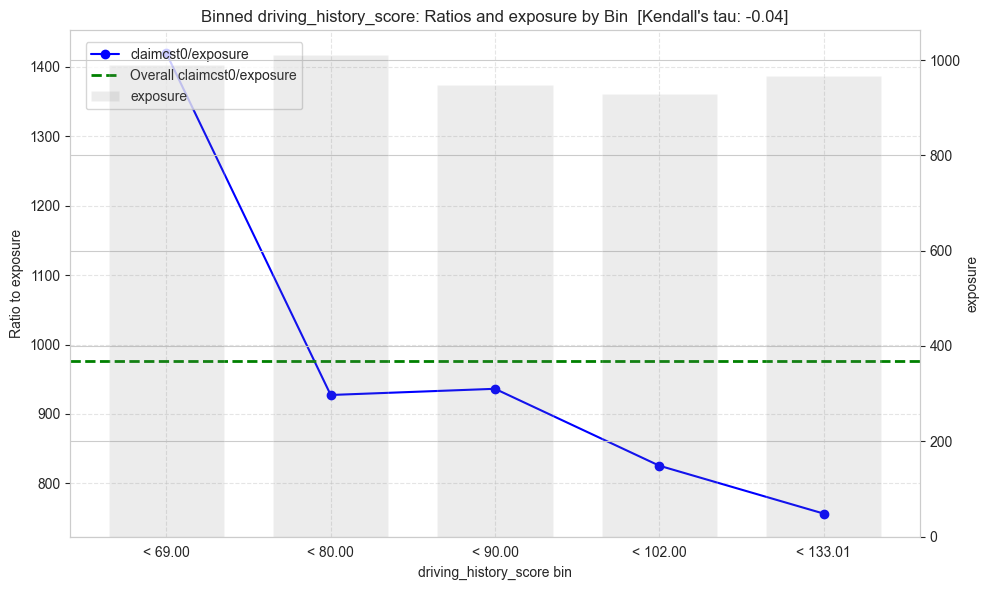


--- Predictiveness Plot for credit_score ---


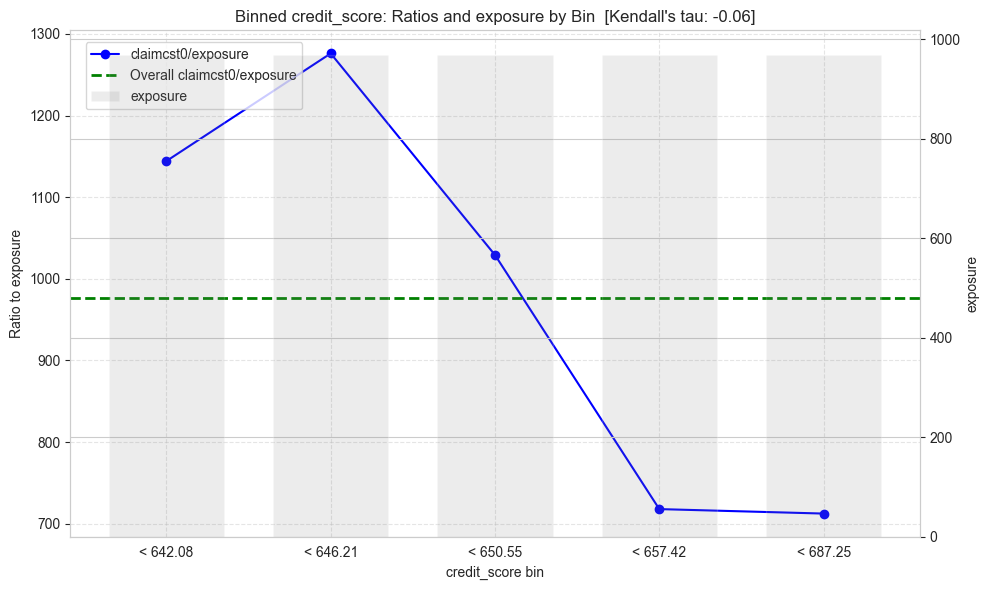


--- Predictiveness Plot for veh_age ---


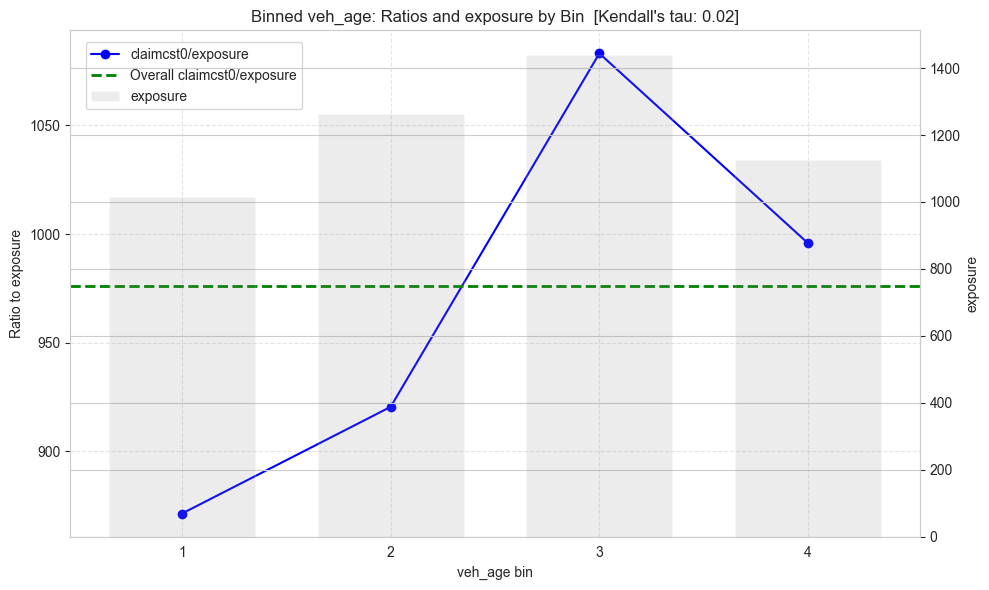


--- Predictiveness Plot for area ---


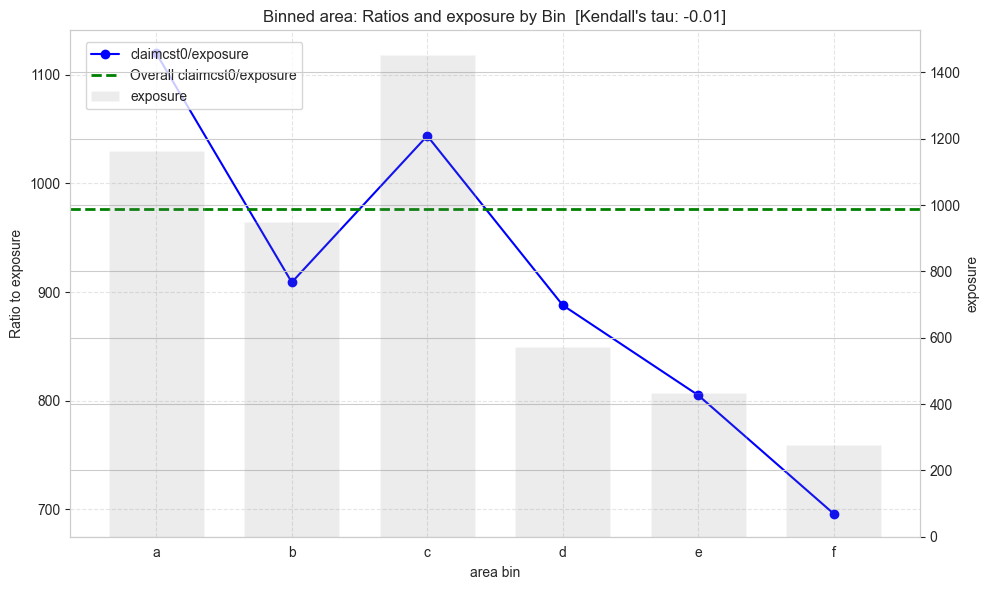


--- Predictiveness Plot for veh_body ---


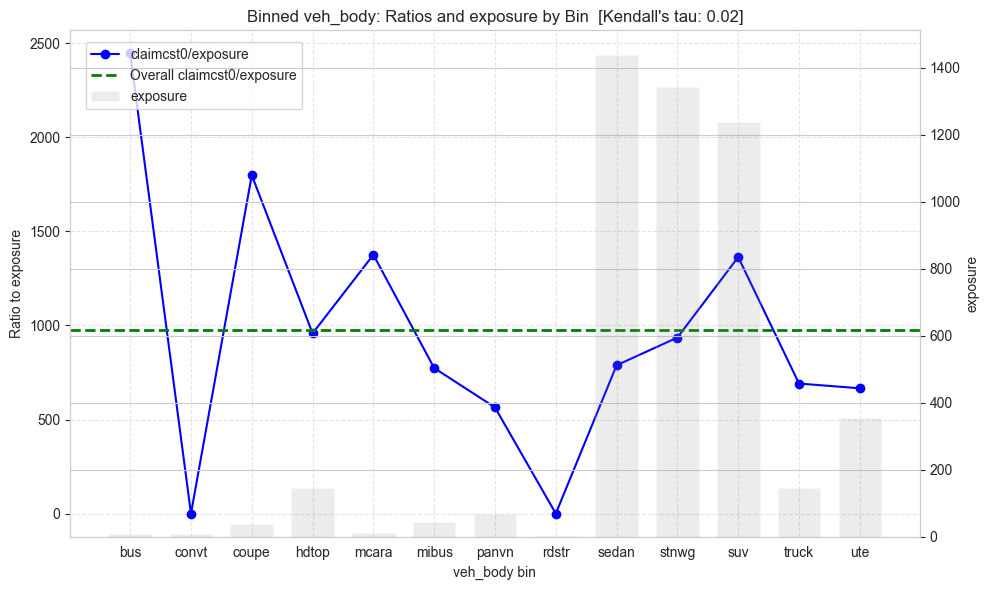


--- Predictiveness Plot for gender ---


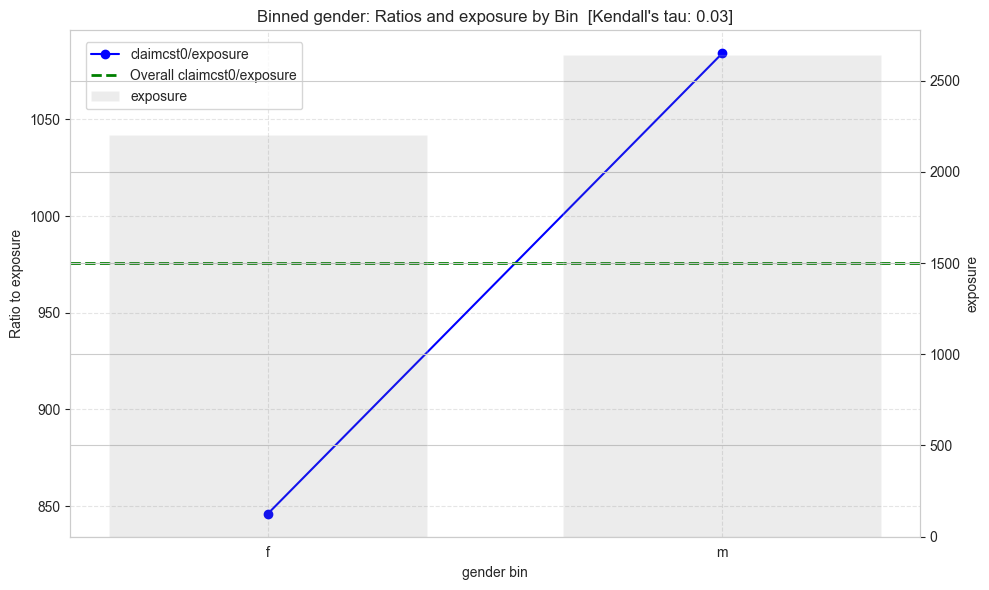


--- Predictiveness Plot for agecat ---


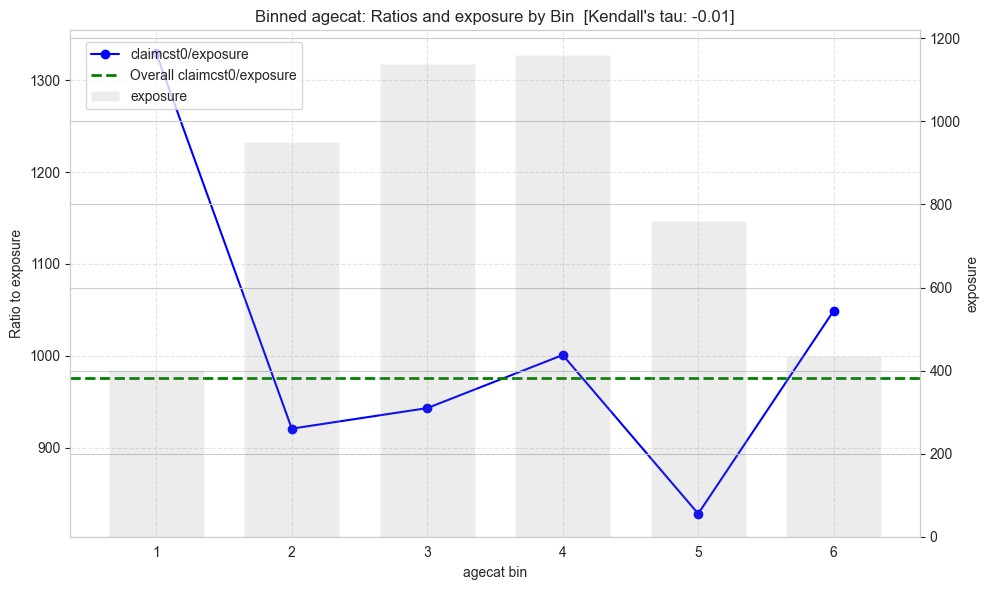


--- Predictiveness Plot for engine_type ---


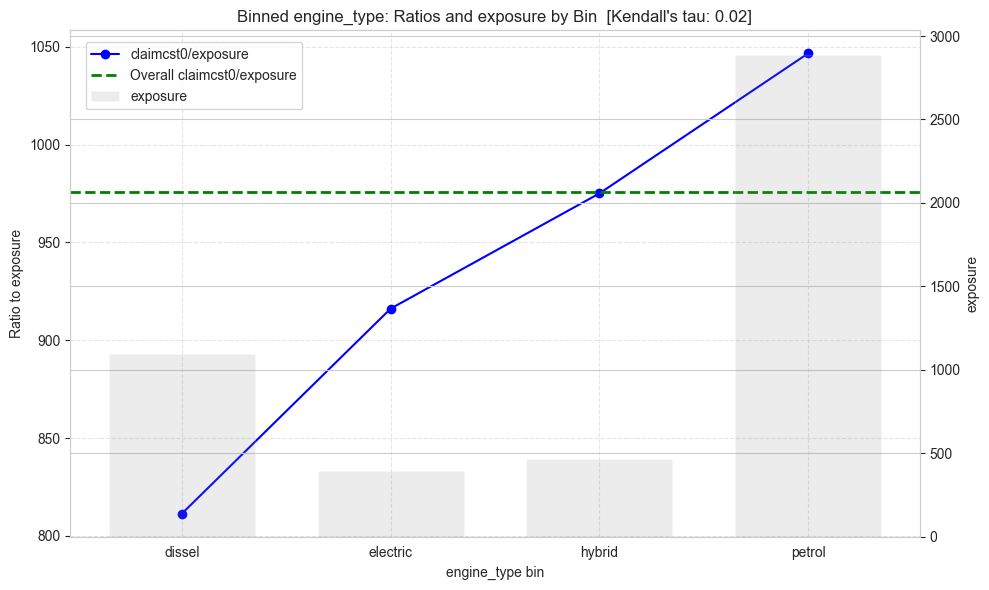


--- Predictiveness Plot for veh_color ---


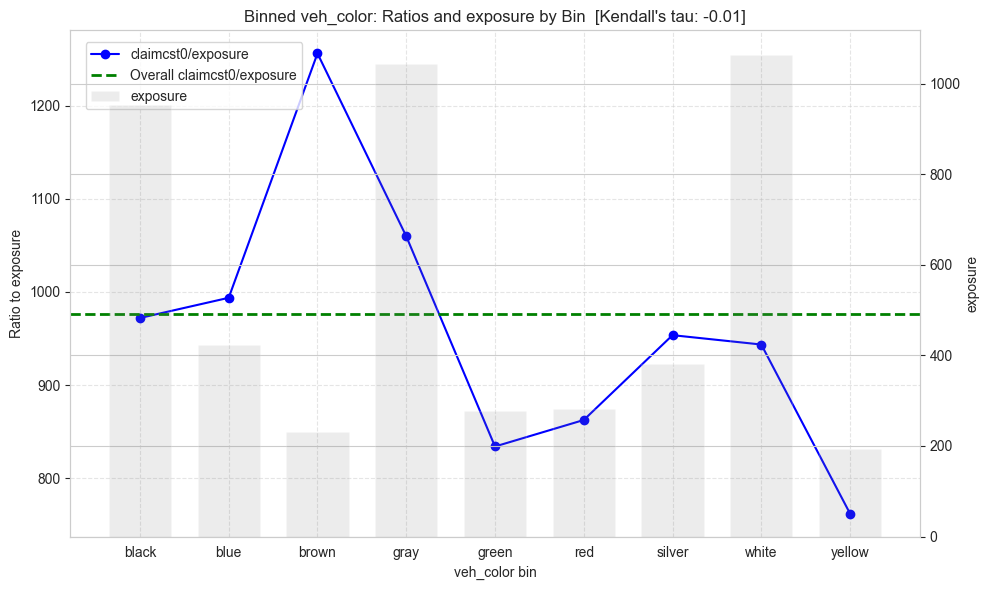


--- Predictiveness Plot for marital_status ---


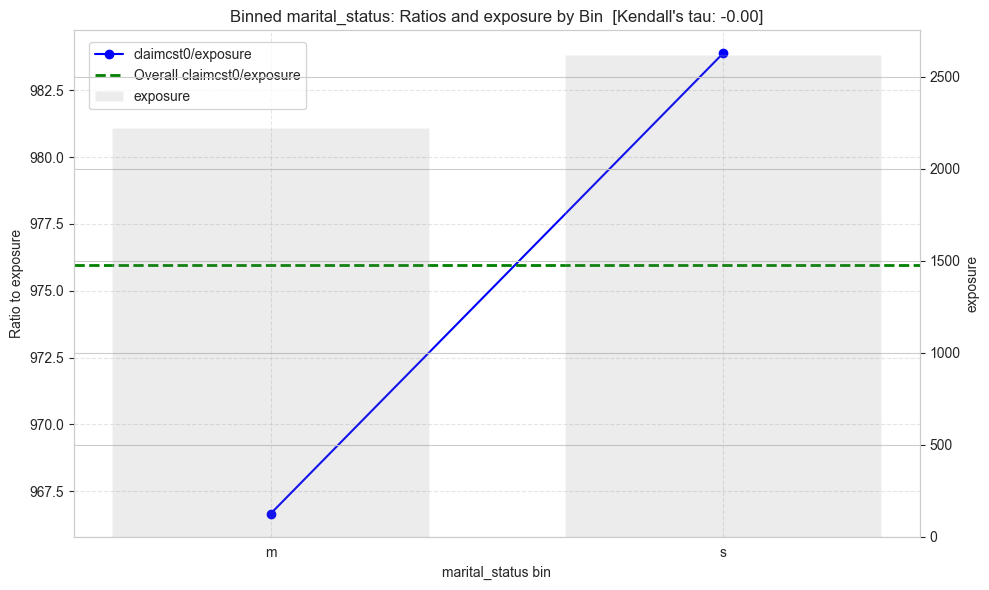


--- Predictiveness Plot for e_bill ---


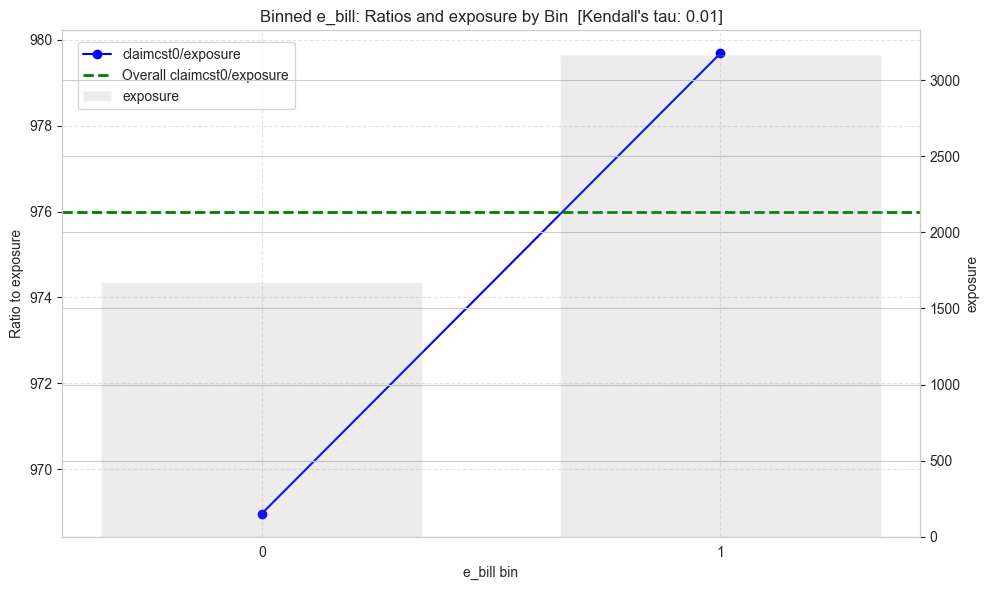


--- Predictiveness Plot for time_of_week_driven ---


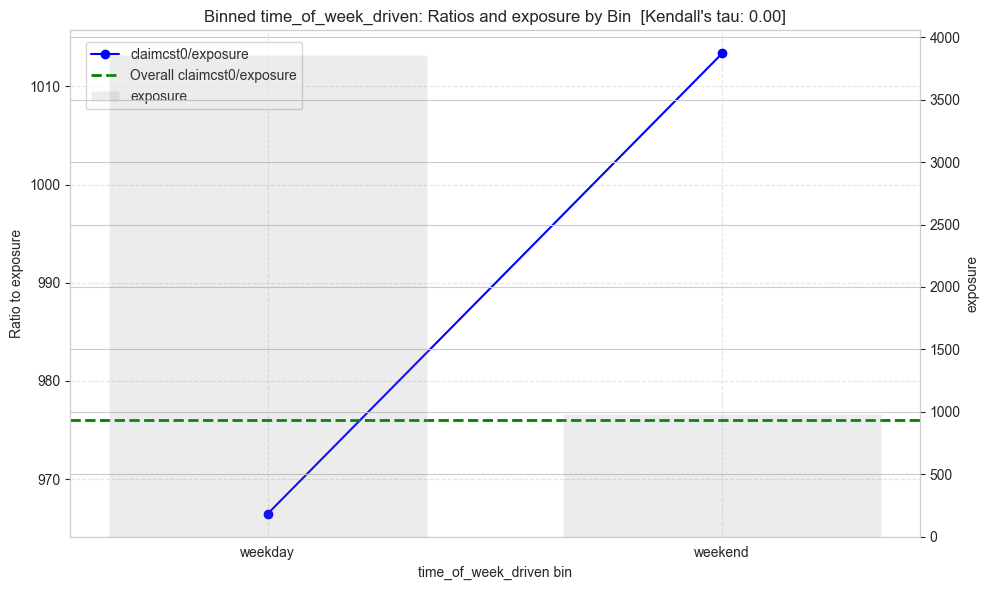


--- Predictiveness Plot for time_driven ---


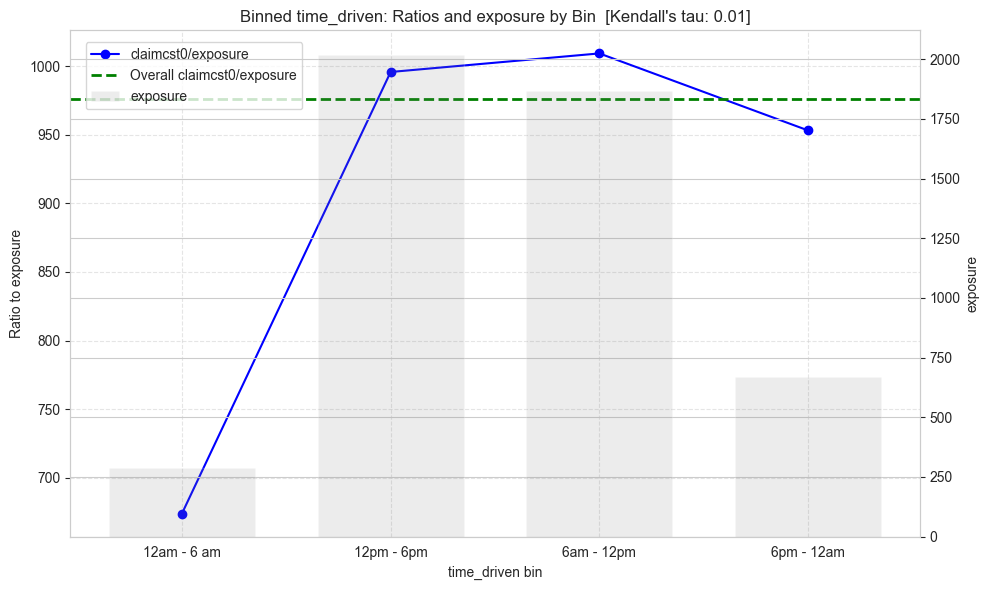


--- Predictiveness Plot for trm_len ---


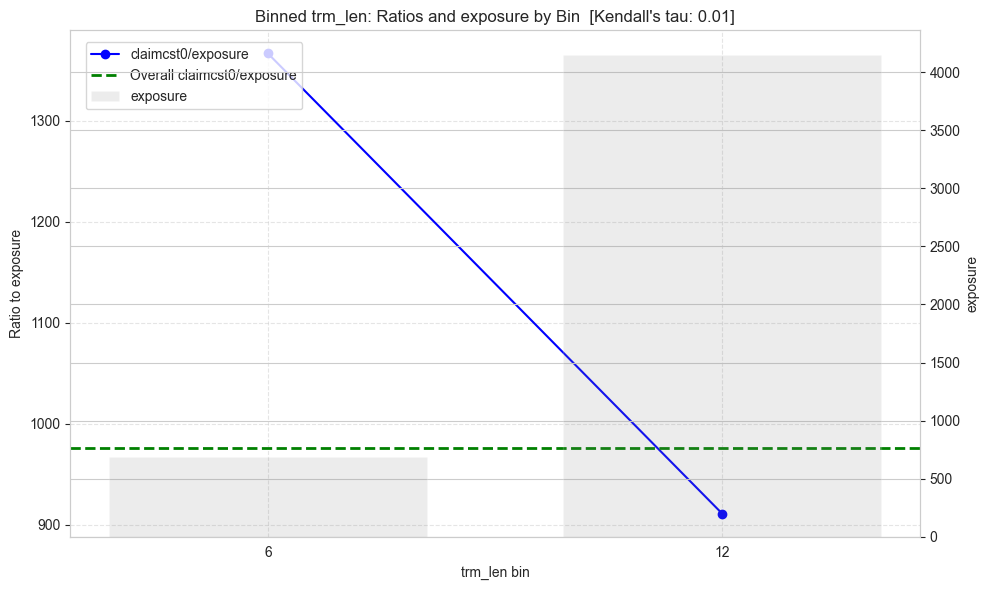


--- Predictiveness Plot for low_education_ind ---


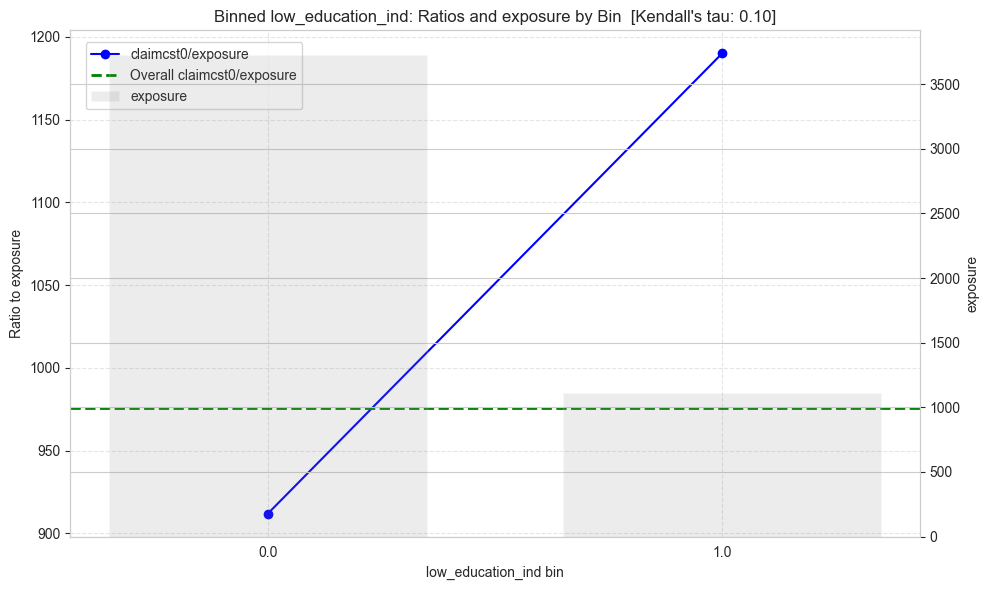

In [23]:
sys.path.append(os.path.abspath(".."))
from analysis_tool_chest.data_exploration import PredictivenessCheckList

# Example setup
train_data = model_data.loc[model_data['sample'] == '1|bld']  
exp_var = 'exposure' 
var_1 = 'claimcst0'     
var_2 = None   
nbins = 5         

# Create and run the PredictivenessCheckList
pcl = PredictivenessCheckList(
    data=train_data,
    pred_var_lst=preds,
    exp_var=exp_var,
    var_1=var_1,
    var_2=var_2,     
    nbins=nbins
)

pcl.run_all()
pcl.plot_all()

## Consistency Check

In [27]:
model_data['data_segment'] = 'model'
inference_data['data_segment'] = 'inference'

cols = ['data_segment'] + preds

combined_expo_pred_data = pd.concat(
    [model_data[cols], 
     inference_data[cols]], 
     axis=0, 
     ignore_index=True
     )

print('Combined data shape:', combined_expo_pred_data.shape)
combined_expo_pred_data.head()

Combined data shape: (30000, 19)


,data_segment,exposure,veh_value,max_power,driving_history_score,credit_score,veh_age,area,veh_body,gender,agecat,engine_type,veh_color,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,low_education_ind
0,model,0.362191,5.80,161,73.0,646.516469,2,b,suv,f,1,hybrid,black,m,0,weekday,12pm - 6pm,6,0.0
1,model,0.632068,5.67,100,88.0,635.400369,4,a,stnwg,f,2,dissel,green,s,0,weekend,6am - 12pm,12,0.0
2,model,0.367460,5.90,74,55.0,646.463131,2,c,sedan,f,2,petrol,gray,m,0,weekday,6am - 12pm,12,0.0
3,model,0.802184,4.79,121,98.0,645.598794,3,b,stnwg,m,4,dissel,black,m,1,weekday,6pm - 12am,12,0.0
4,model,0.485009,6.68,75,66.0,657.348612,3,c,sedan,m,1,petrol,blue,s,0,weekday,6am - 12pm,12,0.0



--- Consistency Plot for exposure ---


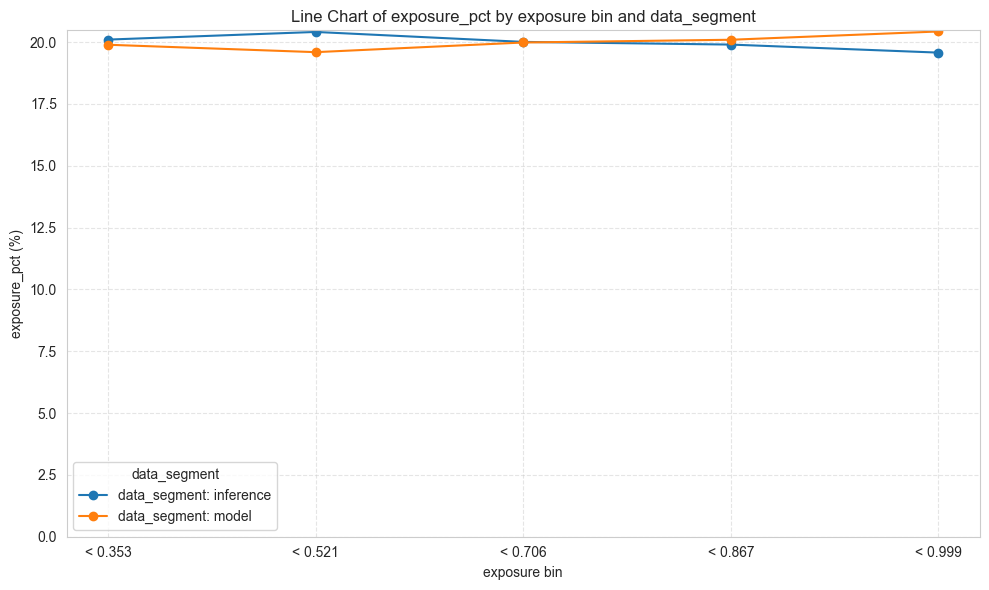


--- Consistency Plot for veh_value ---


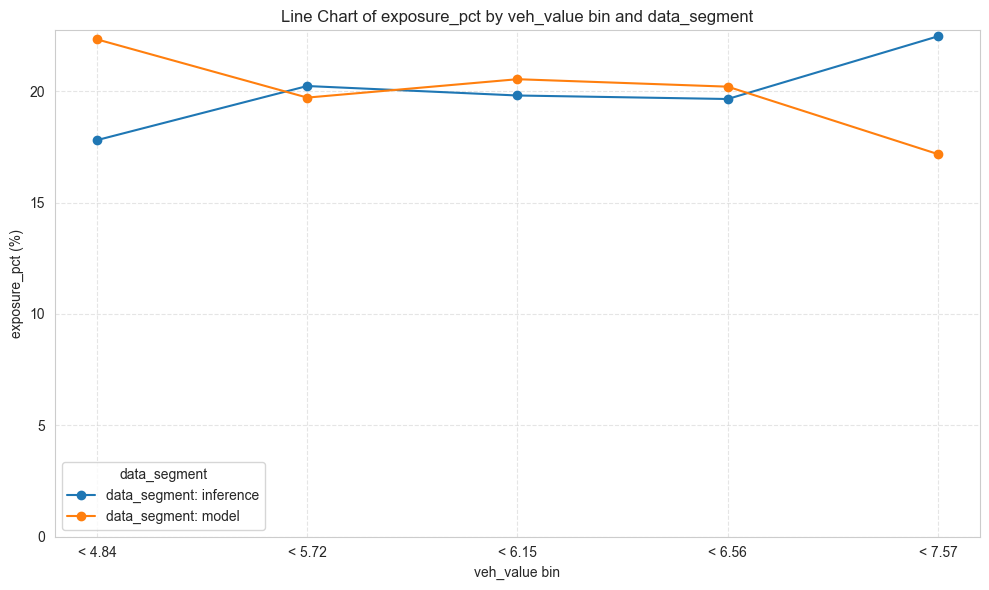


--- Consistency Plot for max_power ---


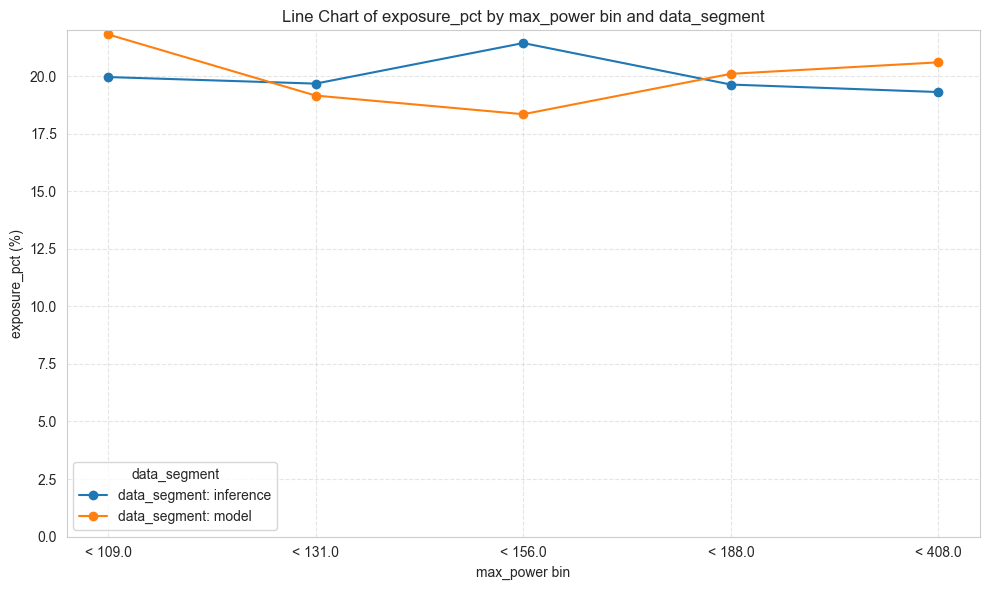


--- Consistency Plot for driving_history_score ---


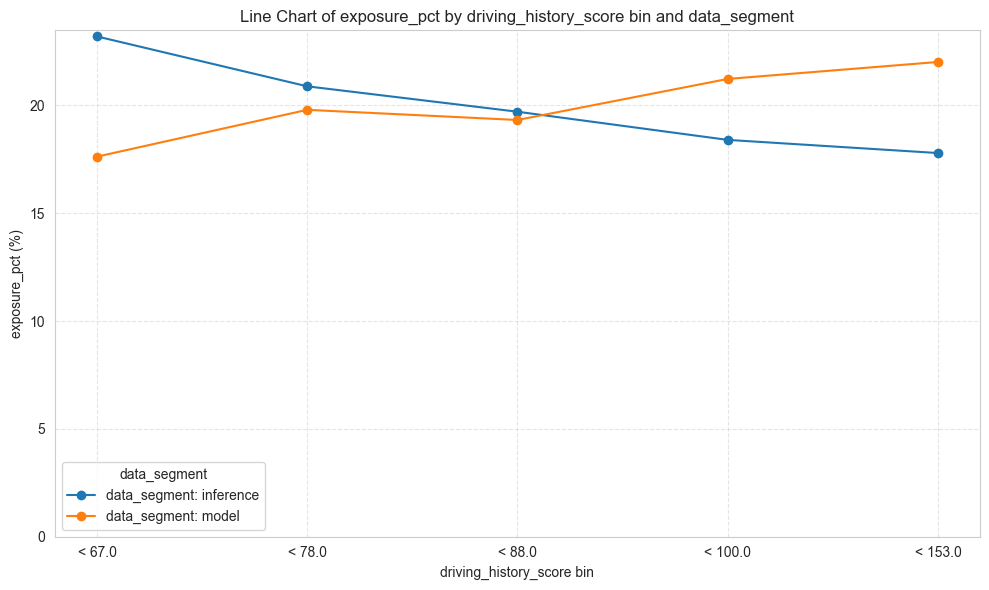


--- Consistency Plot for credit_score ---


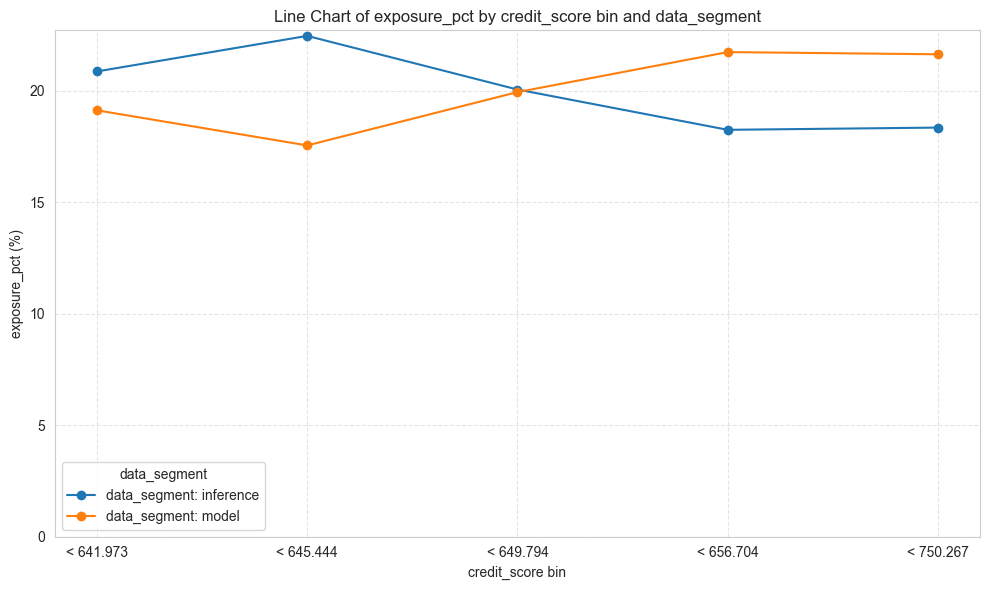


--- Consistency Plot for veh_age ---


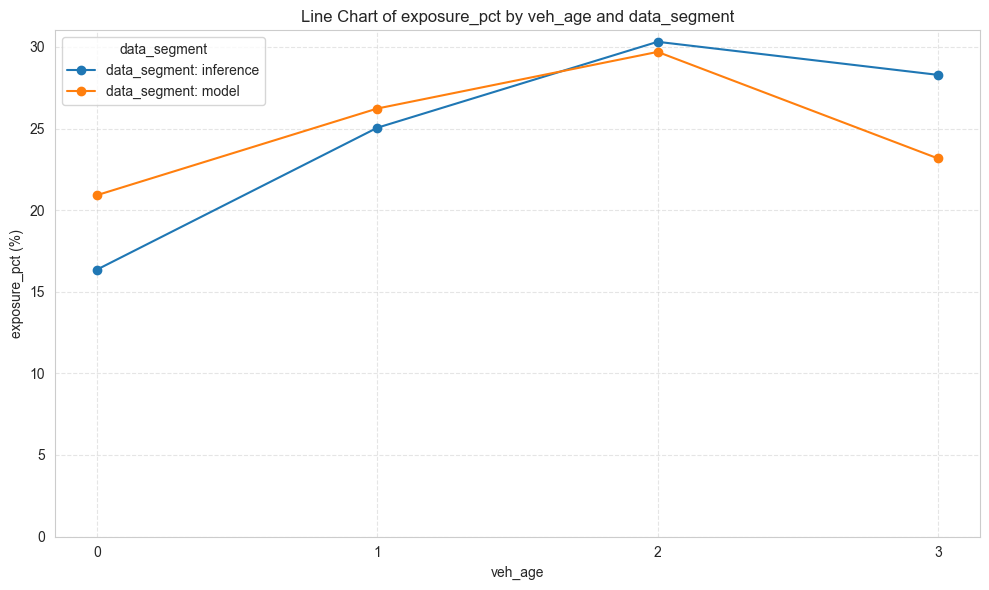


--- Consistency Plot for area ---


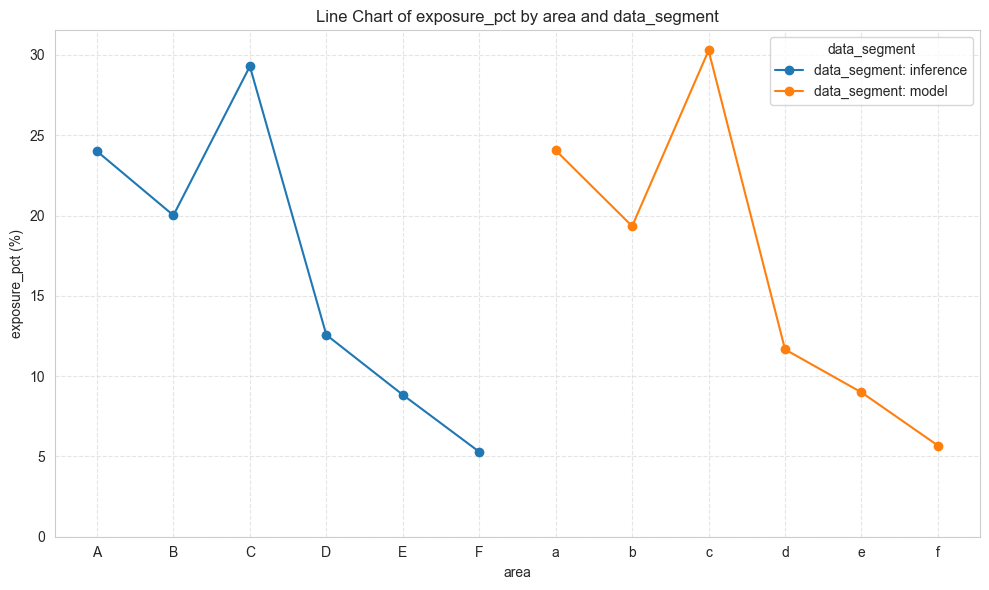


--- Consistency Plot for veh_body ---


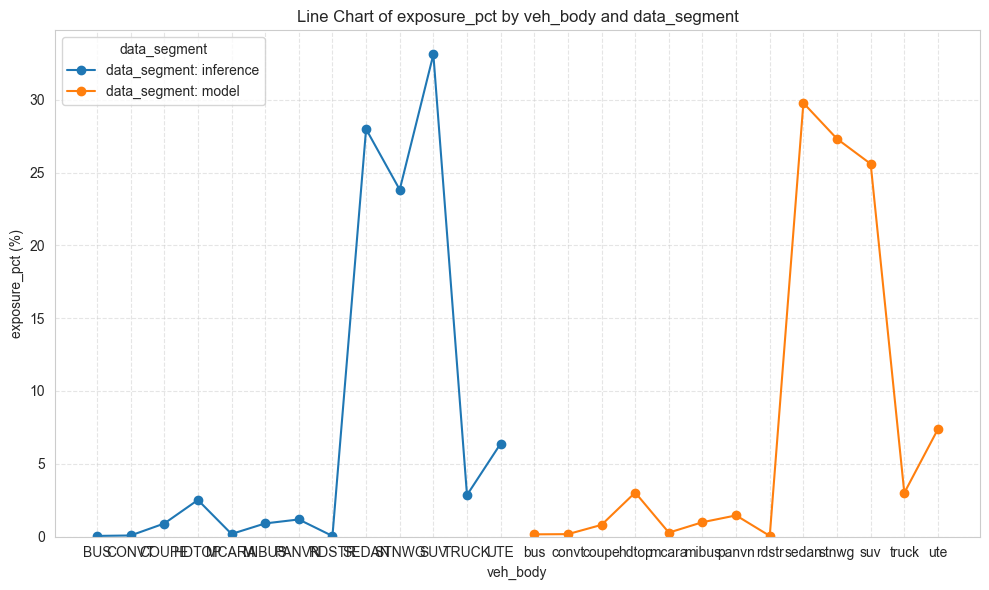


--- Consistency Plot for gender ---


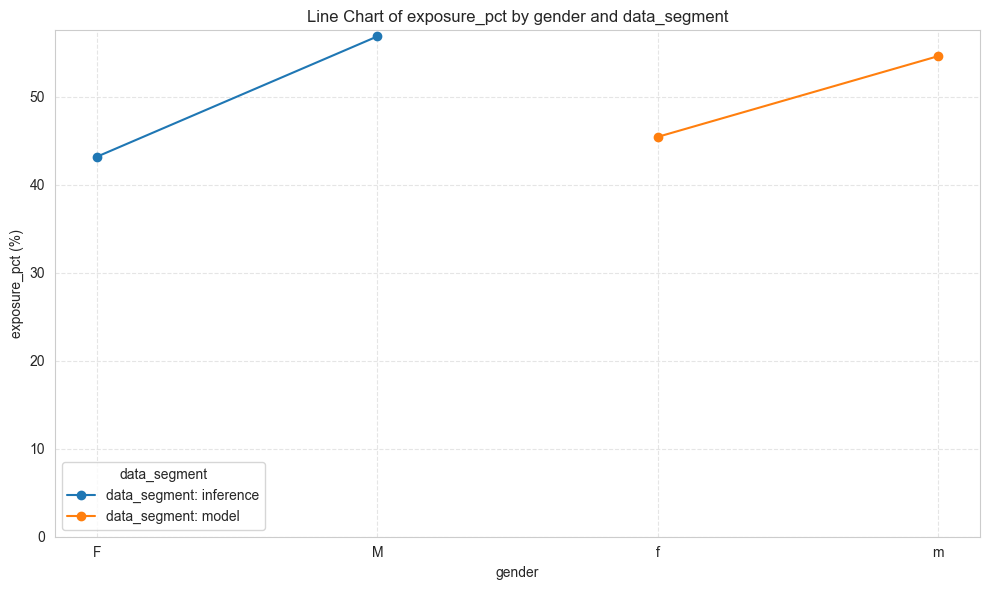


--- Consistency Plot for agecat ---


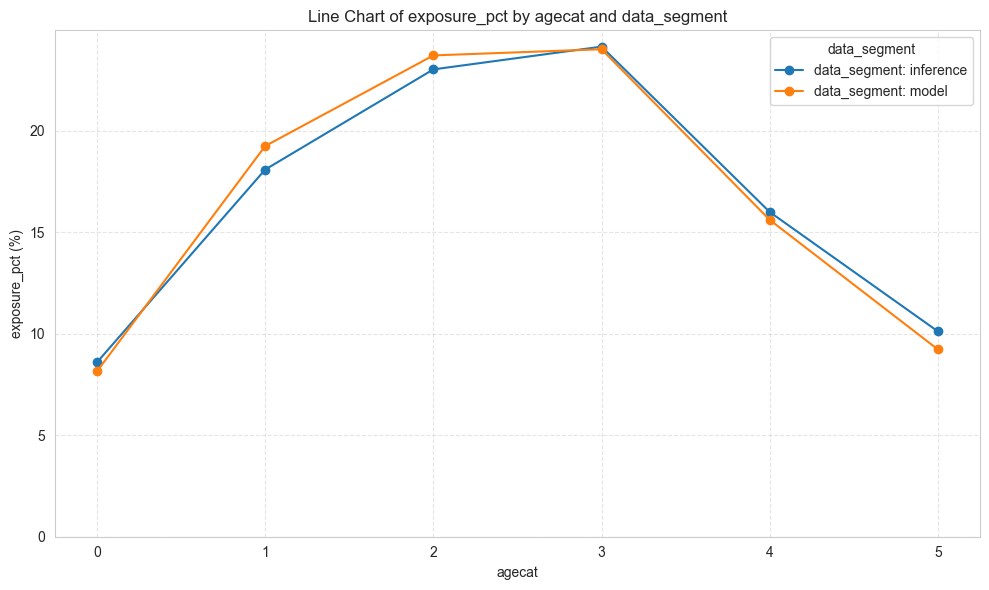


--- Consistency Plot for engine_type ---


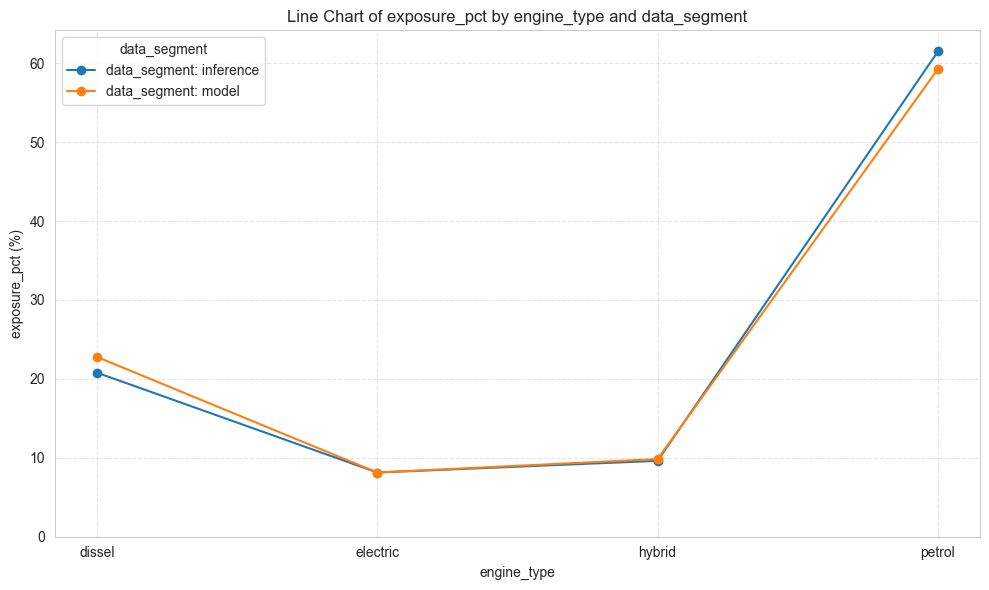


--- Consistency Plot for veh_color ---


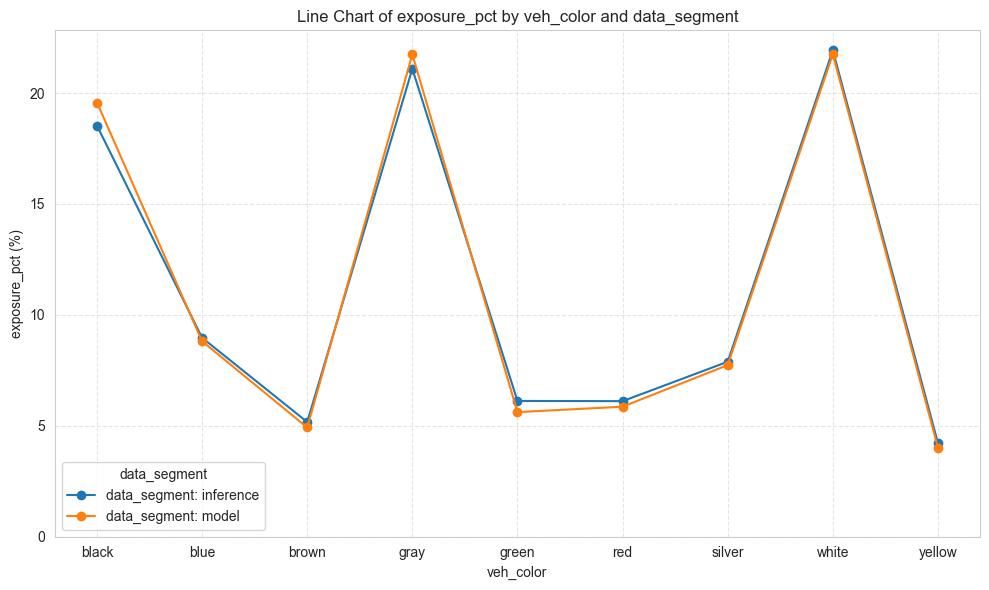


--- Consistency Plot for marital_status ---


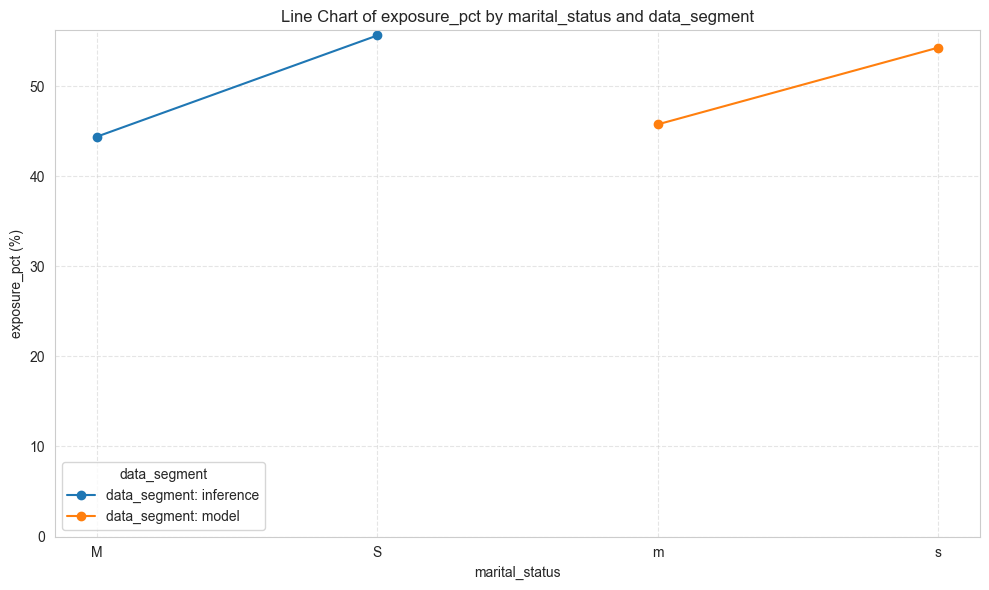


--- Consistency Plot for e_bill ---


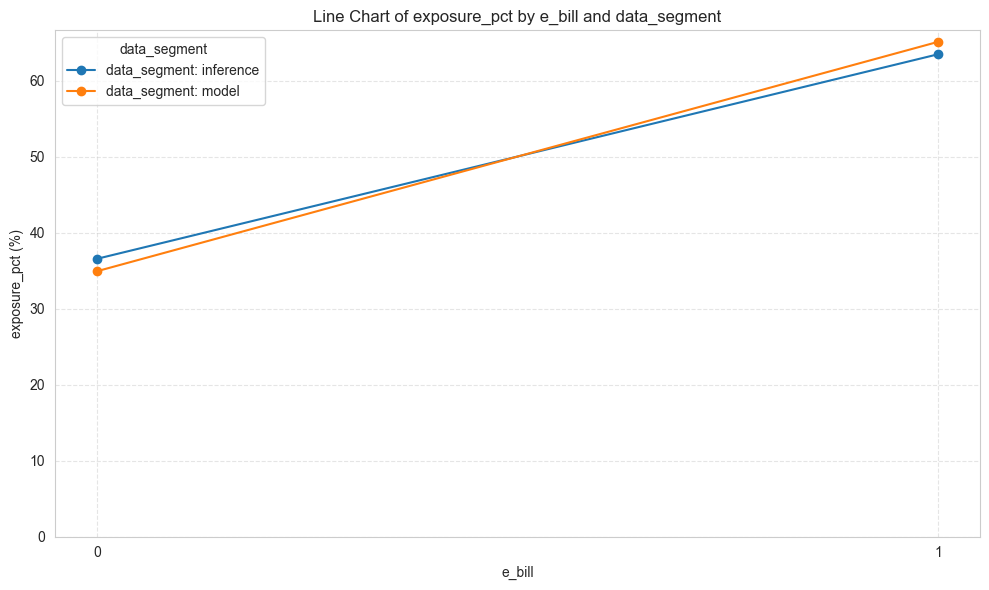


--- Consistency Plot for time_of_week_driven ---


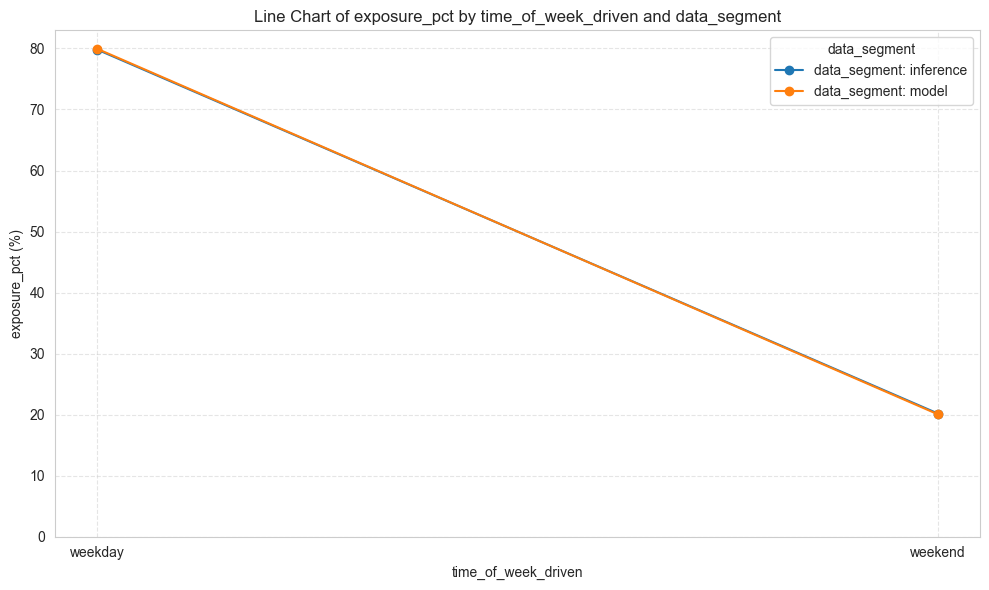


--- Consistency Plot for time_driven ---


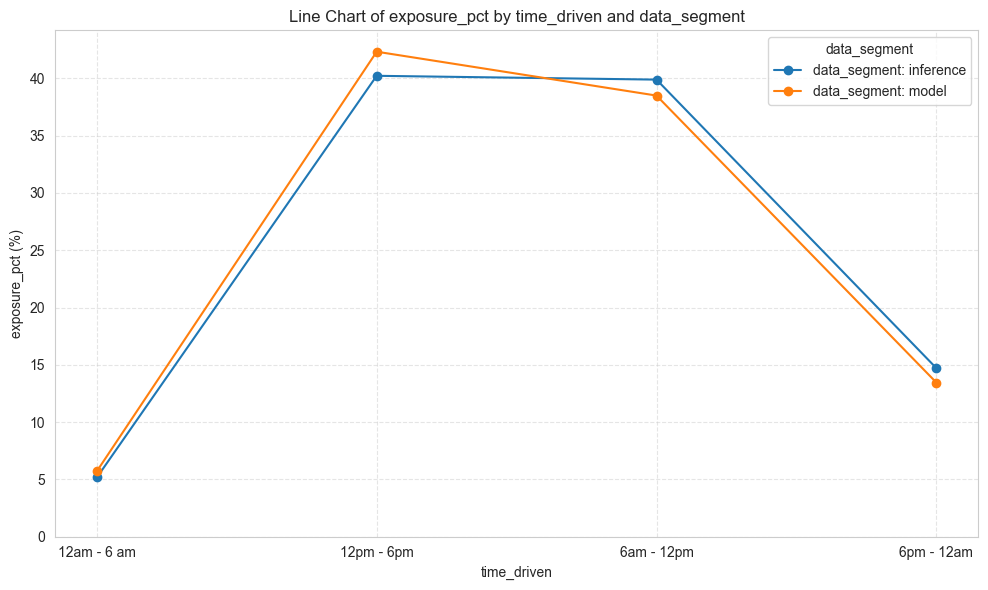


--- Consistency Plot for trm_len ---


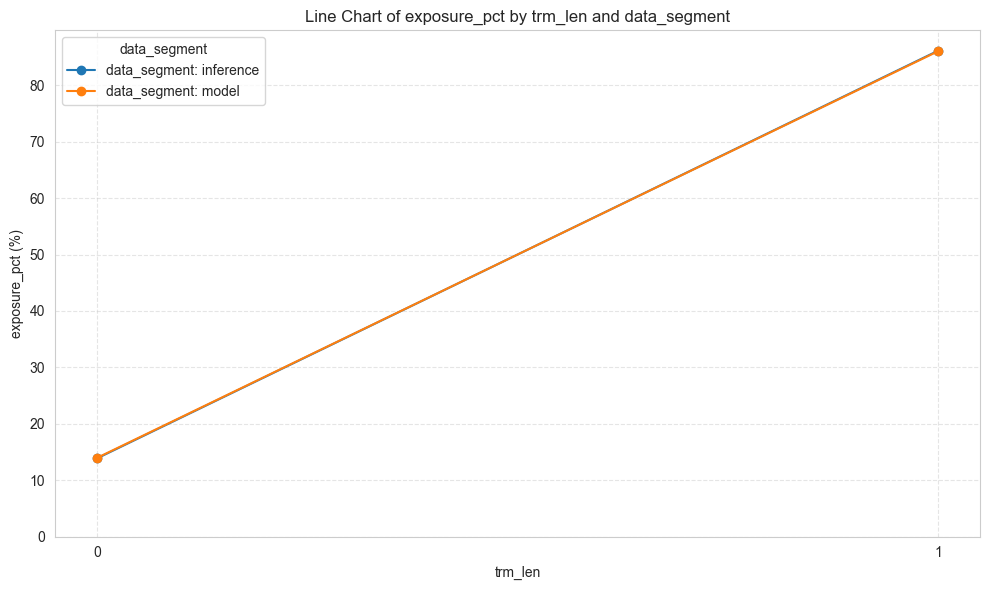


--- Consistency Plot for low_education_ind ---


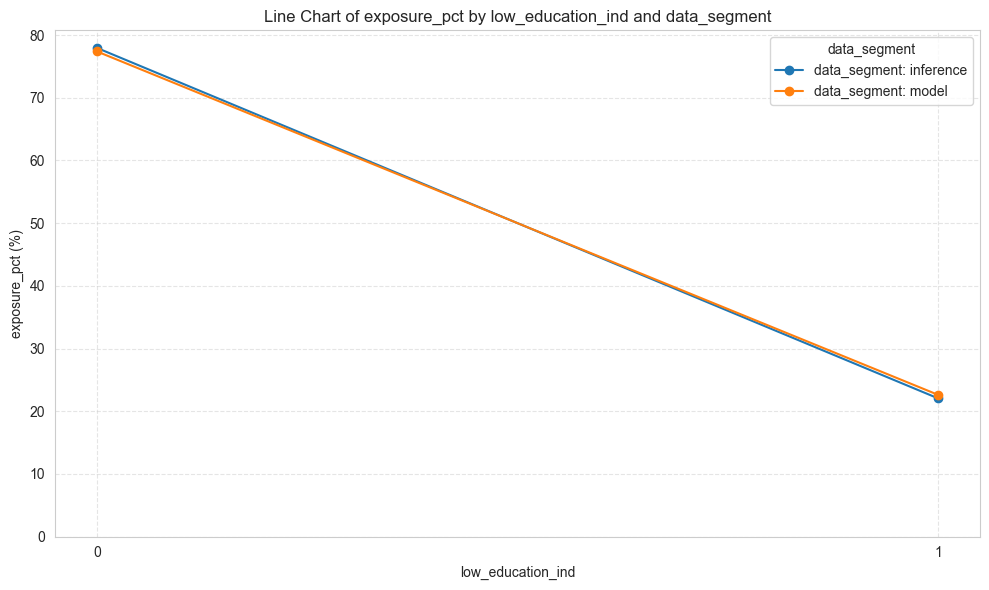

In [28]:
from analysis_tool_chest.data_exploration import ConsistencyCheckList

ccl = ConsistencyCheckList(
    data=combined_expo_pred_data, 
    pred_var_lst=preds, 
    expo_var='exposure', 
    year_var='data_segment')
ccl.run_all()
ccl.plot_all()


Overall Pure Premium: 975.98

Analyzing NUMERICAL: driving_history_score
   driving_history_score_bin     total_cost  total_exposure   avg_value  \
0                          0  700732.604661      483.905231   56.317574   
1                          1  704187.929142      480.324061   65.316071   
2                          2  487977.511495      488.837652   72.140179   
3                          3  450120.016164      500.259454   77.486173   
4                          4  544780.456192      483.187483   82.398214   
5                          5  342172.315645      491.303399   87.625000   
6                          6  407942.280270      488.838203   92.741302   
7                          7  358549.500582      460.735194   98.485714   
8                          8  357774.056752      488.299283  107.274107   
9                          9  373486.510502      478.390450  121.527360   

   pure_premium  
0   1448.078176  
1   1466.068402  
2    998.240437  
3    899.773133  
4   1127.47

/var/folders/jl/j999xwt511q724px0cw79mpr0000gn/T/ipykernel_11952/4214783827.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{val:.1f}' for val in analysis['avg_value']])


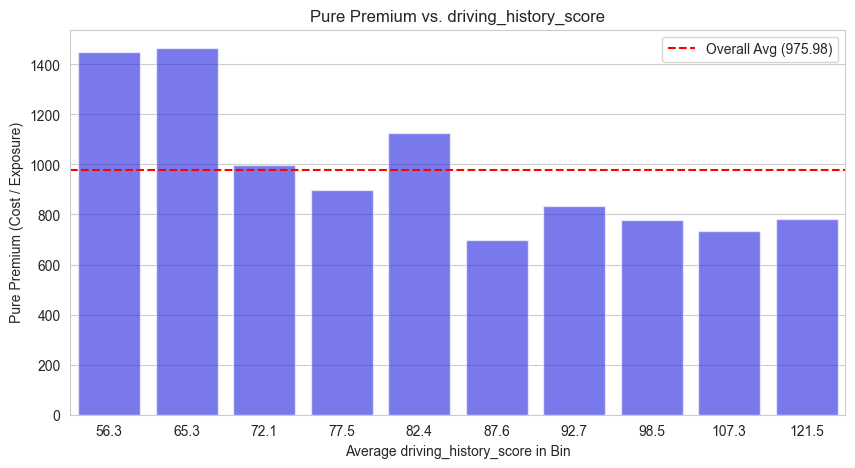


Analyzing NUMERICAL: credit_score
   credit_score_bin     total_cost  total_exposure   avg_value  pure_premium
0                 0  818476.347637      590.738579  638.098564   1385.513620
1                 1  577726.898821      545.228238  641.745392   1059.605609
2                 2  554368.164612      483.572385  643.727758   1146.401618
3                 3  502091.705762      460.990444  645.785013   1089.158599
4                 4  487999.243829      453.007729  647.811061   1077.242645
5                 5  461225.382909      470.659441  649.903047    979.955660
6                 6  362997.952977      474.745344  652.379131    764.616141
7                 7  294861.101604      461.641501  655.830885    638.723124
8                 8  299005.479787      446.848401  661.076018    669.143001
9                 9  368970.903466      456.648350  673.163301    807.997890


/var/folders/jl/j999xwt511q724px0cw79mpr0000gn/T/ipykernel_11952/4214783827.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{val:.1f}' for val in analysis['avg_value']])


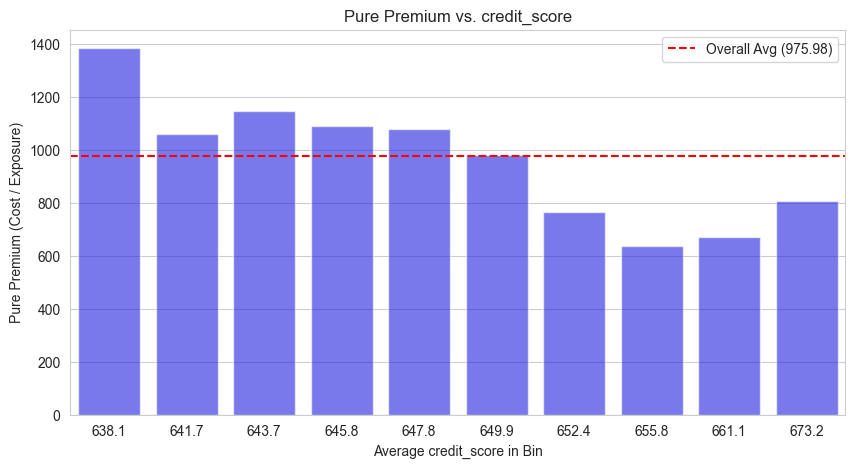


Analyzing CATEGORICAL: low_education_ind
   low_education_ind    total_cost  total_exposure  policy_count  pure_premium
0                0.0  3.401464e+06     3729.631234          9859    912.010768
1                1.0  1.326259e+06     1114.449177          1345   1190.058160


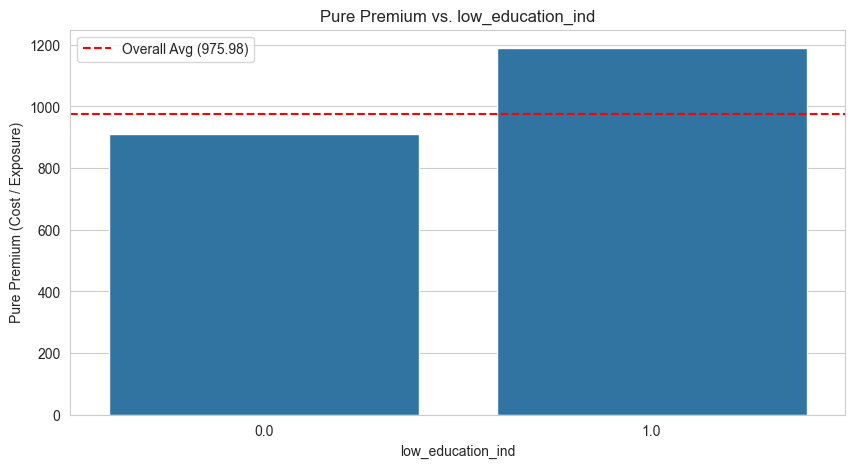


Analyzing CATEGORICAL: marital_status
  marital_status    total_cost  total_exposure  policy_count  pure_premium
0              m  2.148989e+06     2223.114350          5076    966.657103
1              s  2.578734e+06     2620.966061          6128    983.886797


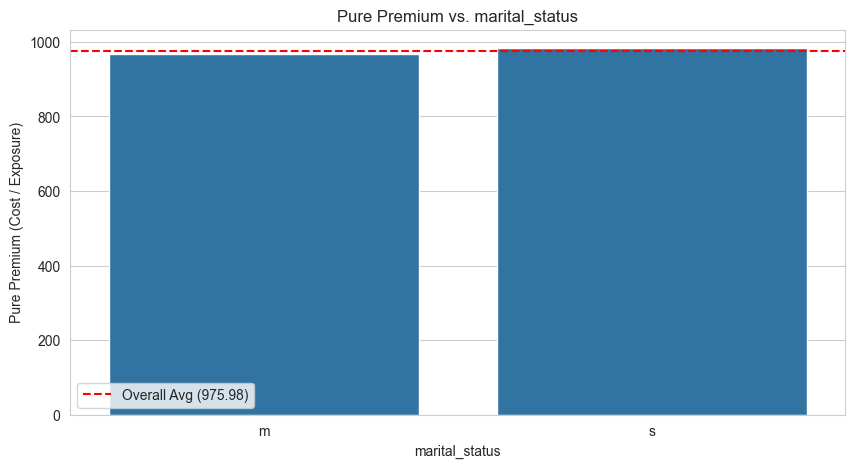


Analyzing CATEGORICAL: time_driven
   time_driven    total_cost  total_exposure  policy_count  pure_premium
0  12am - 6 am  1.933912e+05      286.947818           668    673.959345
1   12pm - 6pm  2.011034e+06     2019.675409          4677    995.721233
2   6am - 12pm  1.884224e+06     1866.962876          4310   1009.245580
3   6pm - 12am  6.390743e+05      670.494307          1549    953.139037


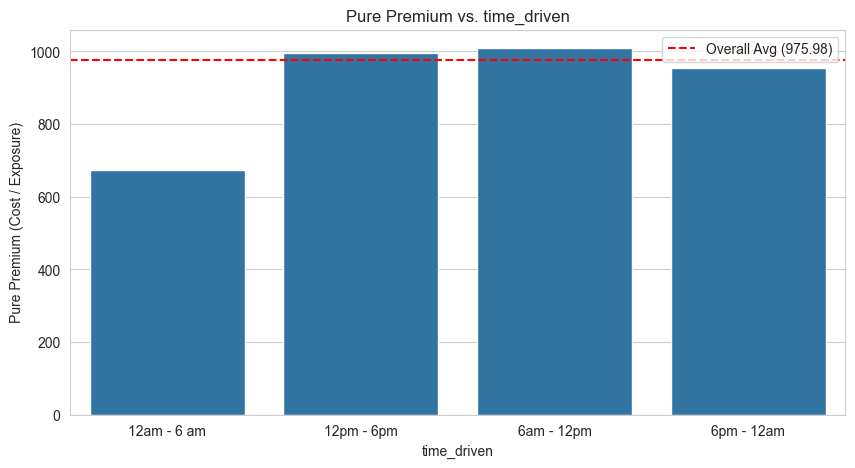


Analyzing CATEGORICAL: area
  area    total_cost  total_exposure  policy_count  pure_premium
0    a  1.300803e+06     1161.965509          2709   1119.484686
1    b  8.614558e+05      947.759314          2169    908.939456
2    c  1.517609e+06     1454.125643          3424   1043.657373
3    d  5.068356e+05      570.851007          1306    887.859777
4    e  3.490331e+05      433.556803           984    805.045899
5    f  1.919870e+05      275.822134           612    696.053746


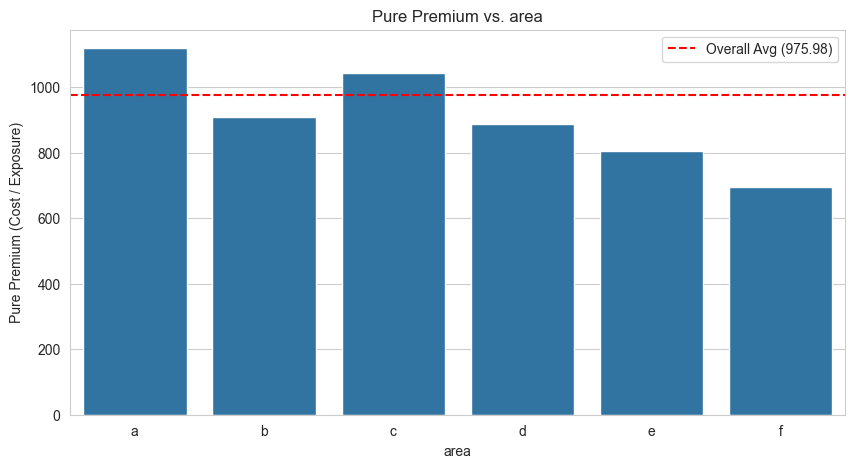


Analyzing CATEGORICAL: agecat
   agecat    total_cost  total_exposure  policy_count  pure_premium
0       1  5.321795e+05      400.434014           962   1329.006616
1       2  8.749712e+05      950.245989          2238    920.783859
2       3  1.074318e+06     1139.079112          2624    943.145744
3       4  1.162011e+06     1160.958828          2658   1000.906225
4       5  6.288318e+05      759.238106          1721    828.240510
5       6  4.554123e+05      434.124361          1001   1049.036425


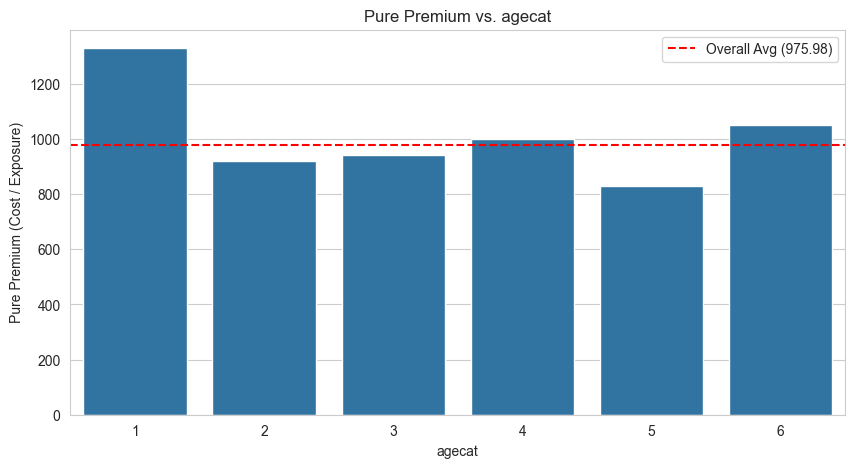


Analyzing CATEGORICAL: agecat_grouped
  agecat_grouped    total_cost  total_exposure  policy_count  pure_premium
0          Elder  4.554123e+05      434.124361          1001   1049.036425
1         Middle  3.740131e+06     4009.522035          9241    932.812297
2          Young  5.321795e+05      400.434014           962   1329.006616


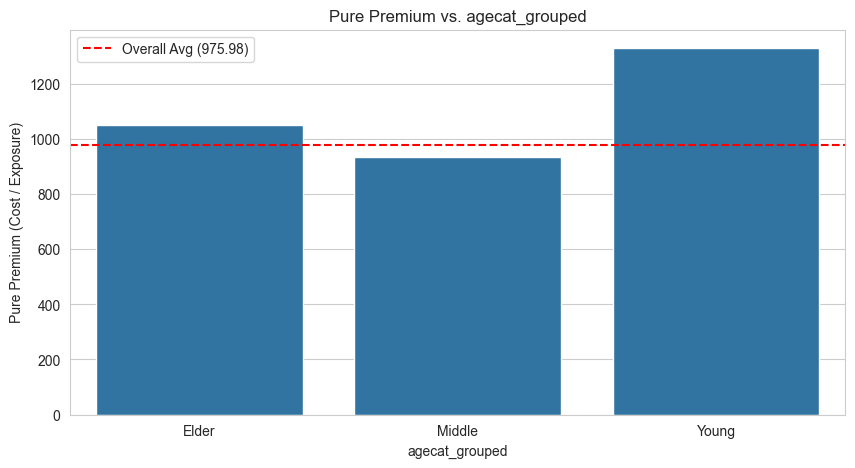


Analyzing CATEGORICAL: gender
  gender    total_cost  total_exposure  policy_count  pure_premium
0      f  1.862314e+06     2201.138987          5027    846.068154
1      m  2.865410e+06     2642.941424          6177   1084.174457


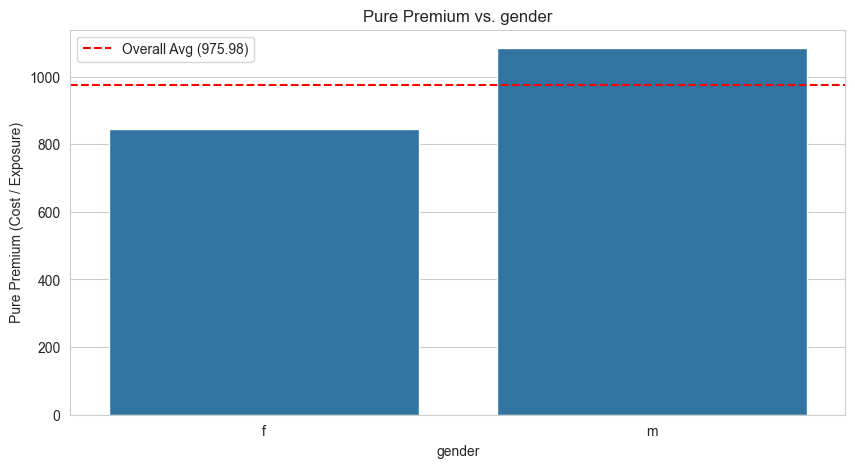


Analyzing CATEGORICAL: veh_color
  veh_color    total_cost  total_exposure  policy_count  pure_premium
0     black  9.256321e+05      952.288310          2165    972.008272
1      blue  4.199487e+05      422.606681           992    993.710527
2     brown  2.897474e+05      230.672957           531   1256.096001
3      gray  1.105033e+06     1042.701715          2417   1059.778291
4     green  2.307019e+05      276.605794           659    834.045717
5       red  2.422175e+05      280.831889           666    862.500014
6    silver  3.625917e+05      380.243343           906    953.577967
7     white  1.003934e+06     1064.018839          2413    943.530360
8    yellow  1.479172e+05      194.110883           455    762.024253


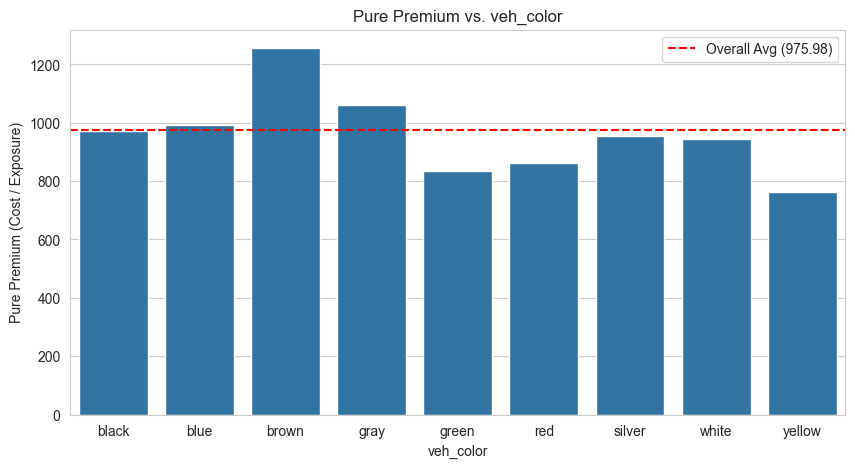


Analyzing NUMERICAL: max_power
   max_power_bin     total_cost  total_exposure   avg_value  pure_premium
0              0  312529.337347      477.726817   81.504906    654.200950
1              1  436330.864171      491.001053  101.856250    888.655658
2              2  535723.082708      491.533146  112.701786   1089.902252
3              3  529623.548196      479.505217  123.792150   1104.520930
4              4  617464.693031      496.606760  136.996429   1243.367475
5              5  554587.335541      480.218943  150.900000   1154.863512
6              6  454037.355982      487.674768  164.586084    931.024908
7              7  487969.303286      490.880558  181.069643    994.069322
8              8  402497.251916      473.492642  200.643750    850.060203
9              9  396960.409225      475.440506  267.525424    834.931824


/var/folders/jl/j999xwt511q724px0cw79mpr0000gn/T/ipykernel_11952/4214783827.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{val:.1f}' for val in analysis['avg_value']])


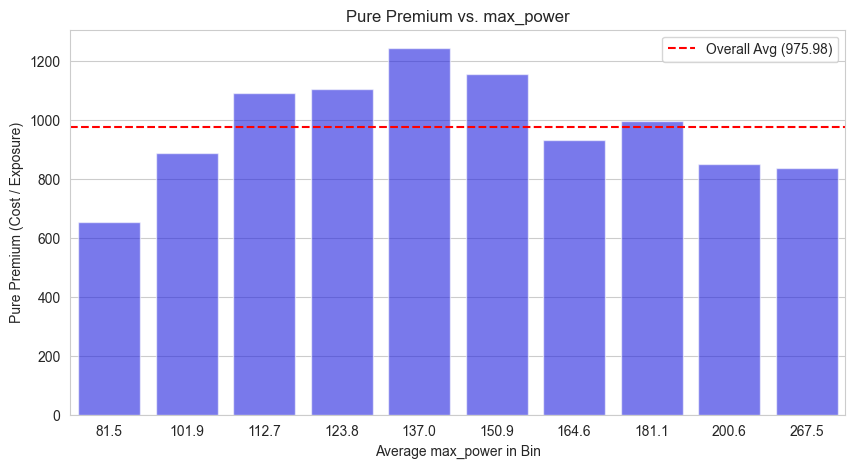


Analyzing CATEGORICAL: engine_type
  engine_type    total_cost  total_exposure  policy_count  pure_premium
0      dissel  8.885951e+05     1095.087549          2519    811.437507
1    electric  3.604695e+05      393.443272           919    916.191733
2      hybrid  4.548679e+05      466.496264          1071    975.072899
3      petrol  3.023791e+06     2889.053326          6695   1046.637217


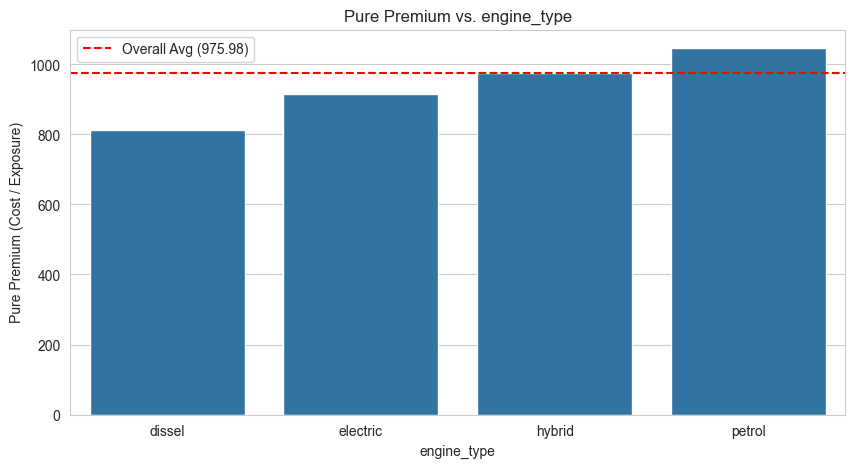


Analyzing CATEGORICAL: veh_age
   veh_age    total_cost  total_exposure  policy_count  pure_premium
0        1  8.845579e+05     1015.347468          2514    871.187375
1        2  1.162962e+06     1263.603303          2896    920.353442
2        3  1.560648e+06     1440.767880          3282   1083.205700
3        4  1.119556e+06     1124.361760          2512    995.725484


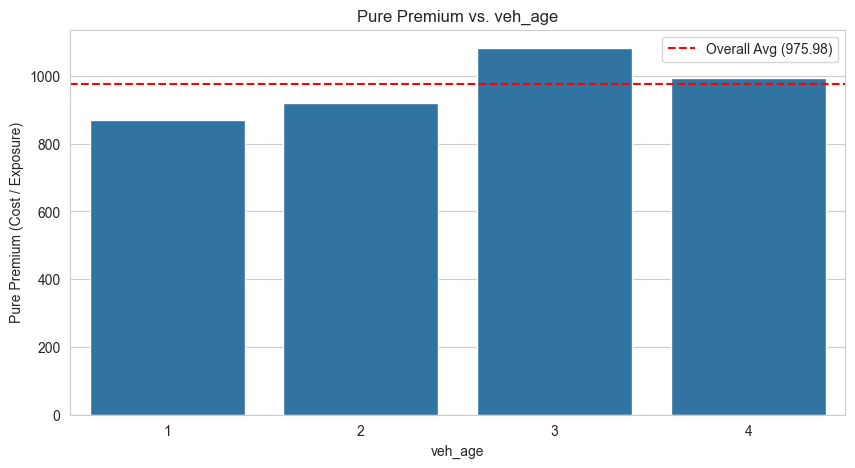


Analyzing CATEGORICAL: veh_body
   veh_body    total_cost  total_exposure  policy_count  pure_premium
0       bus  1.783105e+04        7.290706            13   2445.722834
1     convt  0.000000e+00        8.311495            19      0.000000
2     coupe  6.787514e+04       37.743875            97   1798.308604
3     hdtop  1.400772e+05      146.256833           324    957.747943
4     mcara  1.663512e+04       12.092737            26   1375.629305
5     mibus  3.481325e+04       45.011110           111    773.436936
6     panvn  3.861216e+04       68.442923           138    564.151192
7     rdstr  0.000000e+00        2.266668             6      0.000000
8     sedan  1.134413e+06     1438.982070          3359    788.344247
9     stnwg  1.254641e+06     1341.003435          3049    935.598755
10      suv  1.686657e+06     1237.292726          2880   1363.183563
11    truck  9.984055e+04      144.472887           334    691.067708
12      ute  2.363272e+05      354.912946           848  

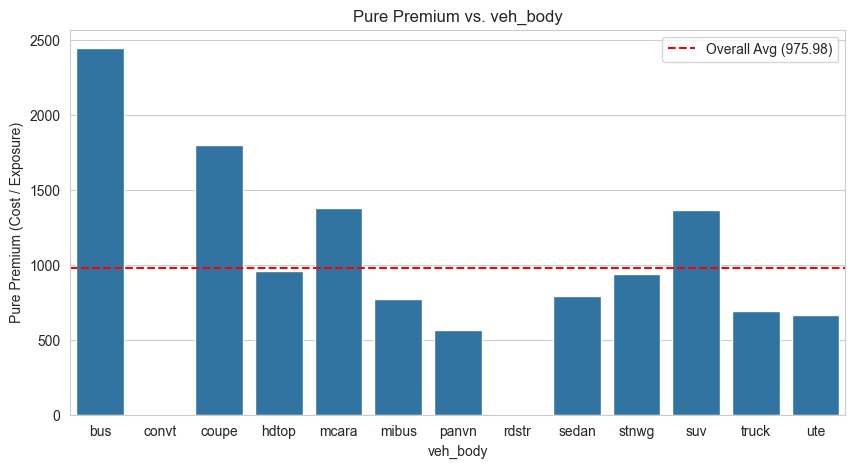


Analyzing CATEGORICAL: veh_body_grouped
  veh_body_grouped    total_cost  total_exposure  policy_count  pure_premium
0            OTHER  1.502610e+06     1630.675907          3686    921.464468
1            coupe  6.787514e+04       37.743875            97   1798.308604
2            sedan  1.134413e+06     1438.982070          3359    788.344247
3              suv  1.686657e+06     1237.292726          2880   1363.183563
4            truck  9.984055e+04      144.472887           334    691.067708
5              ute  2.363272e+05      354.912946           848    665.873848


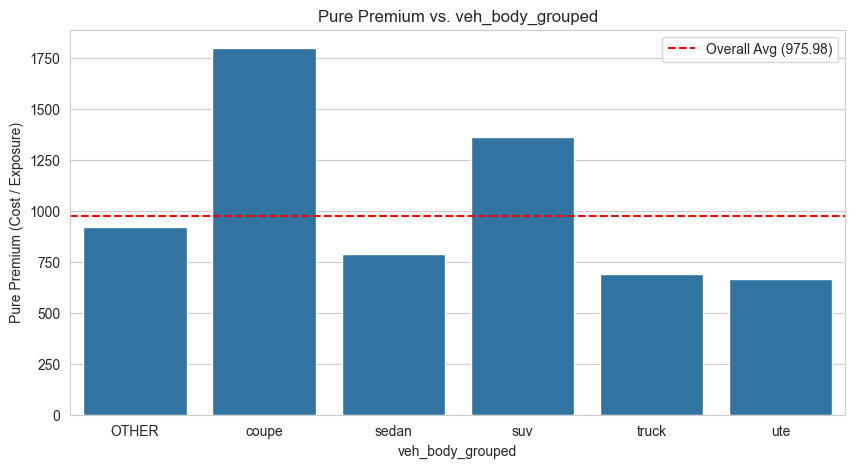


Analyzing NUMERICAL: veh_value
   veh_value_bin     total_cost  total_exposure  avg_value  pure_premium
0              0  331943.018972      479.873764   2.660284    691.729875
1              1  454655.078278      485.176517   4.303393    937.092094
2              2  449799.011523      487.424524   4.980991    922.807510
3              3  565414.203841      500.513570   5.510883   1129.668081
4              4  559174.367622      476.796103   5.803304   1172.774618
5              5  444785.627870      477.592005   6.009509    931.308781
6              6  569063.828774      496.290337   6.190018   1146.634916
7              7  454816.957440      469.076252   6.380536    969.601329
8              8  390044.532922      477.762787   6.611170    816.397893
9              9  508026.554162      493.574551   6.979884   1029.280283


/var/folders/jl/j999xwt511q724px0cw79mpr0000gn/T/ipykernel_11952/4214783827.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{val:.1f}' for val in analysis['avg_value']])


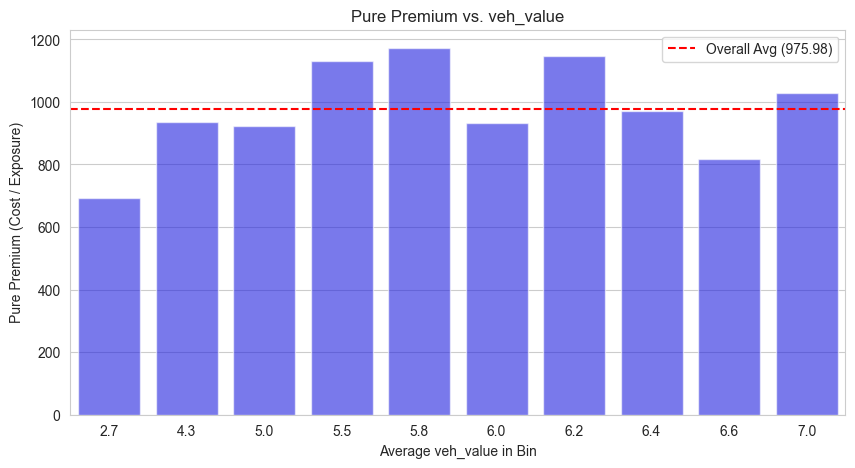


Analyzing CATEGORICAL: e_bill
   e_bill    total_cost  total_exposure  policy_count  pure_premium
0       0  1.622138e+06     1674.093783          3897    968.964635
1       1  3.105586e+06     3169.986627          7307    979.684104


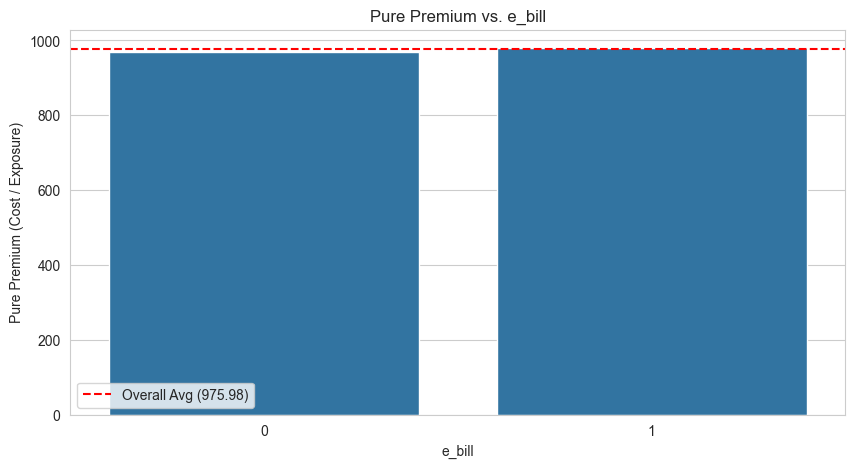


Analyzing CATEGORICAL: trm_len
   trm_len    total_cost  total_exposure  policy_count  pure_premium
0        6  9.428827e+05      689.947261          2840   1366.601125
1       12  3.784840e+06     4154.133149          8364    911.102351


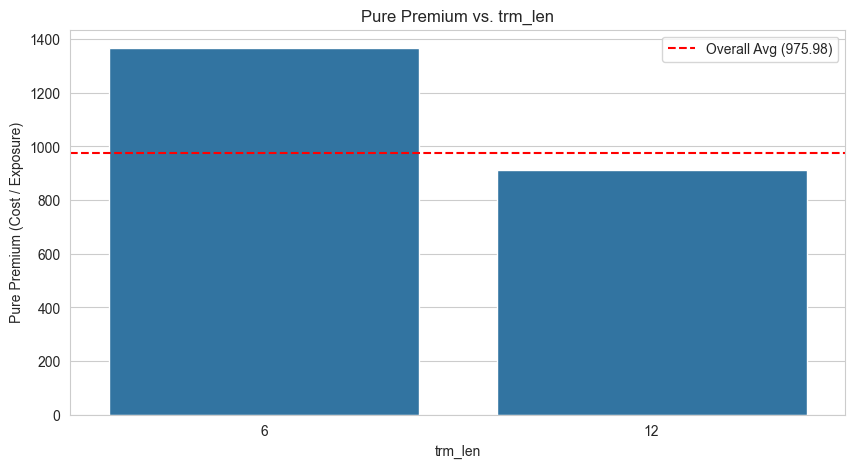


Analyzing CATEGORICAL: time_of_week_driven
  time_of_week_driven    total_cost  total_exposure  policy_count  \
0             weekday  3.732926e+06     3862.399351          8951   
1             weekend  9.947974e+05      981.681060          2253   

   pure_premium  
0    966.478450  
1   1013.361147  


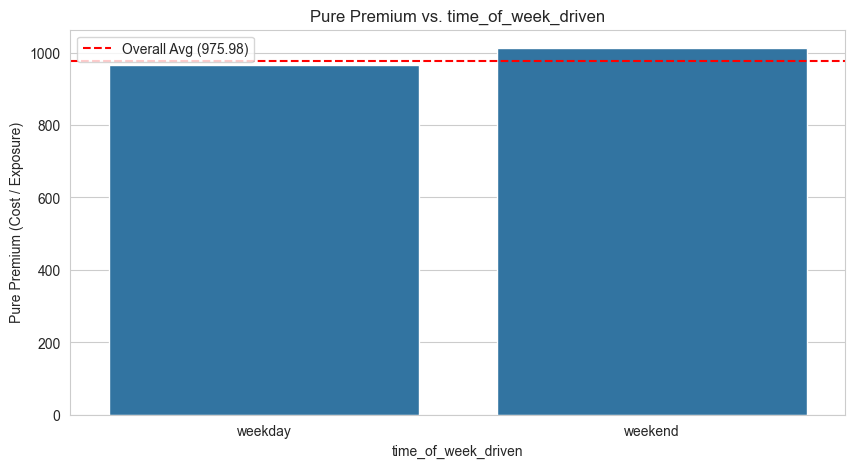

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_variables(df, target_col='claimcst0', exposure_col='exposure'):
    """
    Analyzes all variables in a DataFrame against a target (Pure Premium).
    
    Args:
        df (pd.DataFrame): Training data with predictors and target/exposure.
        target_col (str): The column name for claim cost (e.g., 'claimcst0').
        exposure_col (str): The column name for exposure.
    """
    
    # Calculate overall average Pure Premium
    overall_pp = df[target_col].sum() / df[exposure_col].sum()
    print(f"Overall Pure Premium: {overall_pp:.2f}")
    
    # Get all potential predictors (exclude target/exposure)
    predictors = [col for col in df.columns if col not in [target_col, exposure_col, 'clm', 'numclaims', 'sample', 'id', 'fold']]
    
    for col in predictors:
        if df[col].dtype == 'object' or df[col].nunique() < 15:
            # --- Handle Categorical Variables ---
            print(f"\nAnalyzing CATEGORICAL: {col}")
            plot_categorical_signal(df, col, target_col, exposure_col, overall_pp)
        else:
            # --- Handle Numerical Variables ---
            print(f"\nAnalyzing NUMERICAL: {col}")
            plot_numerical_signal(df, col, target_col, exposure_col, overall_pp)

def plot_categorical_signal(df, col, target_col, exposure_col, overall_pp):
    """Plots Pure Premium for each category of a variable."""
    
    # Group by the category and calculate stats
    analysis = df.groupby(col).agg(
        total_cost=(target_col, 'sum'),
        total_exposure=(exposure_col, 'sum'),
        policy_count=(col, 'size')
    ).reset_index()
    
    # Calculate Pure Premium (cost / exposure)
    analysis['pure_premium'] = analysis['total_cost'] / analysis['total_exposure']
    
    print(analysis)
    
    # Plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=col, y='pure_premium', data=analysis)
    plt.axhline(overall_pp, color='red', linestyle='--', label=f'Overall Avg ({overall_pp:.2f})')
    plt.title(f'Pure Premium vs. {col}')
    plt.ylabel('Pure Premium (Cost / Exposure)')
    plt.legend()
    plt.show()

def plot_numerical_signal(df, col, target_col, exposure_col, overall_pp):
    """Plots Pure Premium for binned numerical variable."""
    
    try:

        df[f'{col}_bin'] = pd.qcut(df[col].rank(method='first'), 10, labels=False)
        
        analysis = df.groupby(f'{col}_bin').agg(
            total_cost=(target_col, 'sum'),
            total_exposure=(exposure_col, 'sum'),
            avg_value=(col, 'mean')
        ).reset_index()
        
        analysis['pure_premium'] = analysis['total_cost'] / analysis['total_exposure']
        
        print(analysis)
        
        # Plot
        plt.figure(figsize=(10, 5))
        ax = sns.barplot(x=f'{col}_bin', y='pure_premium', data=analysis, color='blue', alpha=0.6)
        plt.title(f'Pure Premium vs. {col}')
        plt.ylabel('Pure Premium (Cost / Exposure)')
        
        ax.set_xticklabels([f'{val:.1f}' for val in analysis['avg_value']])
        plt.xlabel(f'Average {col} in Bin')
        plt.axhline(overall_pp, color='red', linestyle='--', label=f'Overall Avg ({overall_pp:.2f})')
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Could not analyze {col} as numerical. Error: {e}")
        print(df[col].describe())


df = pd.read_csv('../backend/model_data_cleaned.csv')
train_df = df[df['sample'] == '1|bld'].copy()

train_df['agecat_grouped'] = train_df['agecat'].apply(
    lambda x: 'Young' if x == 1 else ('Elder' if x == 6 else 'Middle')
)

keep_bodies = ['sedan', 'stnwn', 'suv', 'truck', 'ute', 'coupe']
train_df['veh_body_grouped'] = train_df['veh_body'].apply(
    lambda x: x if x in keep_bodies else 'OTHER'
)

possible_predictors = [
    'driving_history_score',
    'credit_score',
    'low_education_ind',
    'marital_status',
    'time_driven',
    'area',
    'agecat',
    'agecat_grouped',
    'gender',
    'veh_color',
    'max_power',
    'engine_type',
    'veh_age',
    'veh_body',
    'veh_body_grouped',
    'veh_value',
    'e_bill',
    'trm_len',
    'time_of_week_driven'
]

# final df
analysis_cols = possible_predictors + ['claimcst0', 'exposure', 'numclaims', 'clm']
final_analysis_df = train_df[analysis_cols].copy()

analyze_variables(final_analysis_df, 'claimcst0', 'exposure')

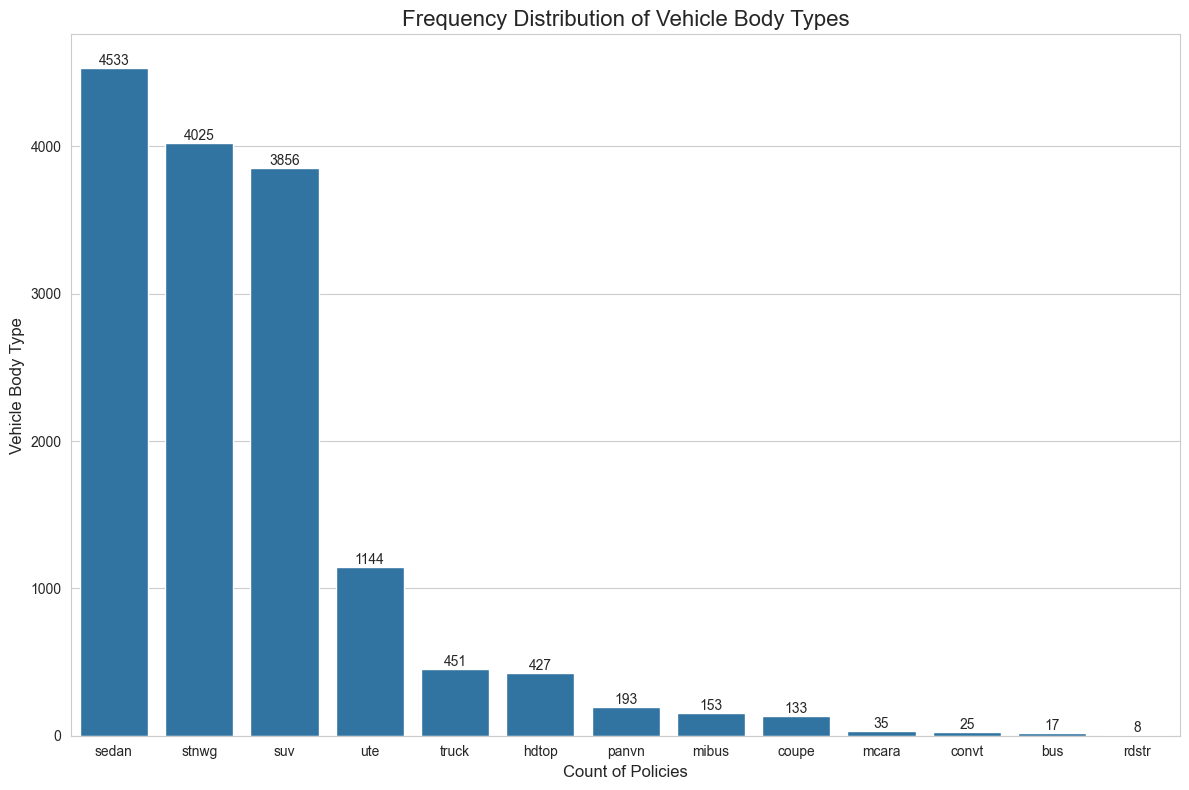

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

counts = model_data['veh_body'].value_counts()
percentages = model_data['veh_body'].value_counts(normalize=True) * 100

# Combine into a single DataFrame for a clean report
freq_df = pd.DataFrame({
    'Count': counts,
    'Percentage': percentages
}).sort_values(by='Count', ascending=False)

freq_df['Percentage'] = freq_df['Percentage'].map('{:,.2f}%'.format)


plt.figure(figsize=(12, 8))
ax = sns.countplot(
    x='veh_body', 
    data=model_data, 
    order=counts.index, 
)

ax.bar_label(ax.containers[0])

plt.title('Frequency Distribution of Vehicle Body Types', fontsize=16)
plt.xlabel('Count of Policies', fontsize=12)
plt.ylabel('Vehicle Body Type', fontsize=12)
plt.tight_layout()
plt.savefig('veh_body_distribution.png')
plt.show()

## Missing Values


In [142]:
# Checking missing values

# C of missing values
missing_prop = model_data.isnull().mean()

# df for missing report
missing_report = pd.DataFrame({
    'Missing_Count': model_data.isnull().sum(),
    'Missing_Proportion': missing_prop
})

missing_report = missing_report[missing_report['Missing_Count'] > 0].sort_values(
    by='Missing_Proportion', ascending=False
)

if missing_report.empty:
    print("No missing values found")
else:
    print(missing_report)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_report.index, y=missing_report['Missing_Percentage'])
    plt.title("Percentage of Missing Values by Feature")
    plt.ylabel("Percent Missing (%)")
    plt.xticks(rotation=45)
    plt.show()


No missing values found


## Variable Reduction

In [143]:
# Encode veh_body (reduce everything expect SEDAN, STNWG, SUV, UTE, TRUCK as OTHER)
possible_predictors = [
    'driving_history_score',
    'credit_score',
    'low_education_ind',
    'marital_status',
    'time_driven', # probably more important than day of week
    'area',
    #'agecat', swapped agecat_grouped for this
    'agecat_grouped',
    'gender',
    'veh_color',
    'max_power',
    'engine_type',
    'veh_age',
    # 'veh_body', # encode- coupe, sedan, stnwg, suv, truck, ute, other)
    'veh_body_grouped',
    'veh_value',
    # 'e_bill',
    'trm_len',
    # 'time_of_week_driven'
]

In [144]:
df_sub = model_data[model_data['sample'] == '1|bld'].copy()

# Re-encoding function for agecat
def group_age_category(cat):
    if cat == 1:
        return 'Young'
    elif cat == 6:
        return 'Elder'
    else:
        return 'Middle'

keep_bodies = {'SEDAN', 'STNWG', 'SUV', 'TRUCK', 'UTE', 'COUPE'}

def group_vehicle_body(body_style):
    if pd.isna(body_style):
        return 'OTHER'

    normalized_style = str(body_style).upper()

    if normalized_style in keep_bodies:
        return normalized_style
    else:
        return 'OTHER'


df_sub['veh_body_grouped'] = df_sub['veh_body'].apply(group_vehicle_body)
df_sub['agecat_grouped'] = df_sub['agecat'].apply(group_age_category)

In [145]:
# Subsetting data to just possible predictors
num_cols = ['veh_value', 'max_power', 'driving_history_score', 'credit_score']
cat_cols = [col for col in possible_predictors if col not in num_cols]

X = df_sub[possible_predictors].copy()

In [146]:
# Encoding cat variables

X_bef_enc = X

# Type casting to ensure proper encoding
for col in ['veh_age', 'agecat_grouped', 'low_education_ind', 'trm_len']: # need to add e_bill if we include this
    X[col] = X[col].astype(str)

# One-hot encoding
X_encoded = pd.get_dummies(X, columns=cat_cols, prefix_sep='_', drop_first=True)

In [77]:
print(X.head())

   driving_history_score  credit_score low_education_ind marital_status  \
0                   73.0    646.516469               0.0              m   
1                   88.0    635.400369               0.0              s   
2                   55.0    646.463131               0.0              m   
3                   98.0    645.598794               0.0              m   
4                   66.0    657.348612               0.0              s   

  time_driven area agecat_grouped gender veh_color  max_power engine_type  \
0  12pm - 6pm    b          Young      f     black        161      hybrid   
1  6am - 12pm    a         Middle      f     green        100      dissel   
2  6am - 12pm    c         Middle      f      gray         74      petrol   
3  6pm - 12am    b         Middle      m     black        121      dissel   
4  6am - 12pm    c          Young      m      blue         75      petrol   

  veh_age veh_body_grouped  veh_value trm_len  
0       2              SUV       5.80 

In [116]:
# Final check

# will get issues of perfect multicollinearity without this
constant_cols = [col for col in X_encoded.columns if X_encoded[col].nunique() <= 1]
if constant_cols:
    print(f"Dropping constant columns: {constant_cols}")
    X_encoded = X_encoded.drop(columns=constant_cols)

# Shouldn't be any null values, but fill just in case (varclushi cannot handle missing values)
X_encoded = X_encoded.astype(float)
X_encoded = X_encoded.fillna(0)

print(f"Original Shape: {X.shape}")
print(f"Encoded Shape:  {X_encoded.shape}")
print("\nFirst 5 rows of encoded data:")
print(X_encoded.head())


Original Shape: (11204, 15)
Encoded Shape:  (11204, 38)

First 5 rows of encoded data:
   driving_history_score  credit_score  max_power  veh_value  \
0                   73.0    646.516469      161.0       5.80   
1                   88.0    635.400369      100.0       5.67   
2                   55.0    646.463131       74.0       5.90   
3                   98.0    645.598794      121.0       4.79   
4                   66.0    657.348612       75.0       6.68   

   low_education_ind_1.0  marital_status_s  time_driven_12pm - 6pm  \
0                    0.0               0.0                     1.0   
1                    0.0               1.0                     0.0   
2                    0.0               0.0                     0.0   
3                    0.0               0.0                     0.0   
4                    0.0               1.0                     0.0   

   time_driven_6am - 12pm  time_driven_6pm - 12am  area_b  ...  veh_age_2  \
0                     0.0     

Dropping 0 highly correlated columns: []


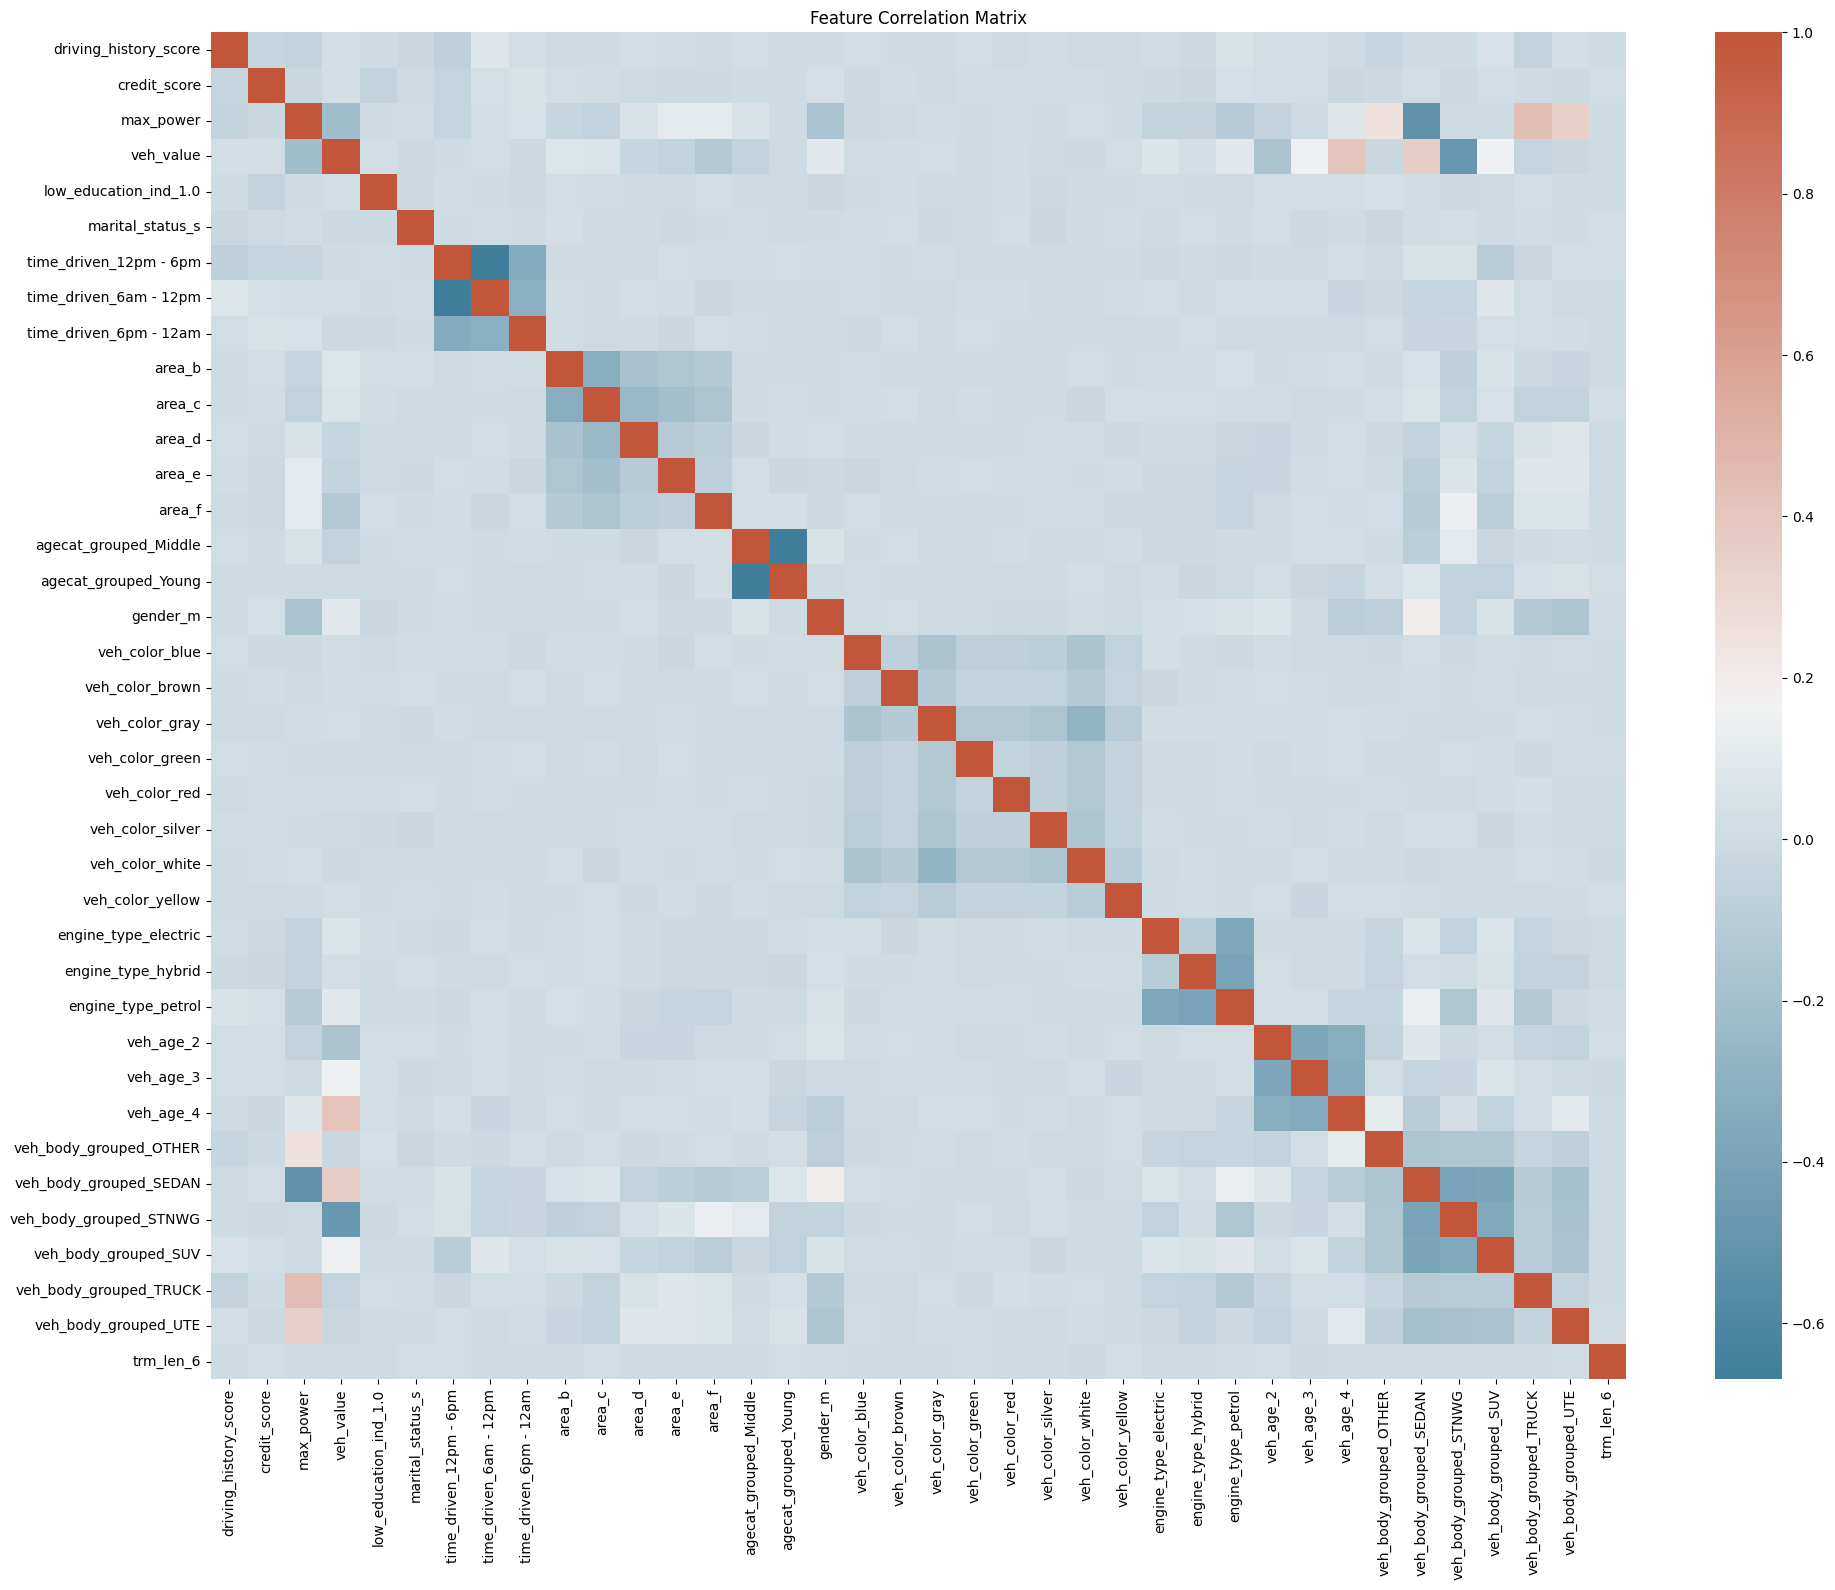

In [66]:
# Having issues with varclushi, so trying things

# Drop constant columns (variance = 0)
X_encoded = X_encoded.loc[:, X_encoded.std() > 0]

# Check for perfect correlation (> 0.99)
corr_matrix = X_encoded.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns to drop
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]

print(f"Dropping {len(to_drop)} highly correlated columns: {to_drop}")
X_encoded = X_encoded.drop(columns=to_drop)

# Plotting corr matrix
corr = X_encoded.corr()

plt.figure(figsize=(20, 16))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()


In [147]:
cat_preds = [
    'low_education_ind',
    'marital_status',
    'time_driven', # probably more important than day of week
    'area',
    #'agecat', swapped agecat_grouped for this
    'agecat_grouped',
    'gender',
    'veh_color',
    'engine_type',
    'veh_age',
    #'veh_body', # encode- coupe, sedan, stnwg, suv, truck, ute, other)
    'veh_body_grouped',
    #'e_bill',
    'trm_len',
    #'time_of_week_driven'
]

In [148]:
# Creating rf dataset
from sklearn.preprocessing import OrdinalEncoder

X_train_rf = X_bef_enc[possible_predictors].copy()
y_train_rf = df_sub[['claimcst0', 'numclaims', 'clm', 'exposure']].copy()

cat_cols = X_train_rf.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical features to encode: {cat_cols}")

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_rf[cat_cols] = encoder.fit_transform(X_train_rf[cat_cols])

print("Final Training Shape:", X_train_rf.shape)

print("Category Value Counts")
for col in cat_preds:
    print(f"\nVariable: {col}")
    print(X_train_rf[col].value_counts().sort_index())

train_df_rf = X_train_rf.join(y_train_rf)

Categorical features to encode: ['low_education_ind', 'marital_status', 'time_driven', 'area', 'agecat_grouped', 'gender', 'veh_color', 'engine_type', 'veh_age', 'veh_body_grouped', 'trm_len']
Final Training Shape: (11204, 15)
Category Value Counts

Variable: low_education_ind
low_education_ind
0.0    9859
1.0    1345
Name: count, dtype: int64

Variable: marital_status
marital_status
0.0    5076
1.0    6128
Name: count, dtype: int64

Variable: time_driven
time_driven
0.0     668
1.0    4677
2.0    4310
3.0    1549
Name: count, dtype: int64

Variable: area
area
0.0    2709
1.0    2169
2.0    3424
3.0    1306
4.0     984
5.0     612
Name: count, dtype: int64

Variable: agecat_grouped
agecat_grouped
0.0    1001
1.0    9241
2.0     962
Name: count, dtype: int64

Variable: gender
gender
0.0    5027
1.0    6177
Name: count, dtype: int64

Variable: veh_color
veh_color
0.0    2165
1.0     992
2.0     531
3.0    2417
4.0     659
5.0     666
6.0     906
7.0    2413
8.0     455
Name: count, dtype

In [149]:
train_df_rf.head()

,driving_history_score,credit_score,low_education_ind,marital_status,time_driven,area,agecat_grouped,gender,veh_color,max_power,engine_type,veh_age,veh_body_grouped,veh_value,trm_len,claimcst0,numclaims,clm,exposure
0,73.0,646.516469,0.0,0.0,1.0,1.0,2.0,0.0,0.0,161,2.0,1.0,4.0,5.80,1.0,2023.198184,1,1,0.362191
1,88.0,635.400369,0.0,1.0,2.0,0.0,1.0,0.0,4.0,100,0.0,3.0,3.0,5.67,0.0,3600.172234,1,1,0.632068
2,55.0,646.463131,0.0,0.0,2.0,2.0,1.0,0.0,3.0,74,3.0,1.0,2.0,5.90,0.0,2021.144067,1,1,0.367460
3,98.0,645.598794,0.0,0.0,3.0,1.0,1.0,1.0,0.0,121,0.0,2.0,3.0,4.79,0.0,4006.845492,1,1,0.802184
4,66.0,657.348612,0.0,1.0,2.0,2.0,2.0,1.0,1.0,75,3.0,2.0,2.0,6.68,0.0,2542.953931,1,1,0.485009


                  Feature  Importance
1            credit_score    0.203598
13              veh_value    0.156771
9               max_power    0.152286
0   driving_history_score    0.125330
8               veh_color    0.061768
5                    area    0.050850
12       veh_body_grouped    0.043581
11                veh_age    0.039765
4             time_driven    0.037815
6          agecat_grouped    0.030189
10            engine_type    0.029764
3          marital_status    0.020636
7                  gender    0.019890
2       low_education_ind    0.017185
14                trm_len    0.010574


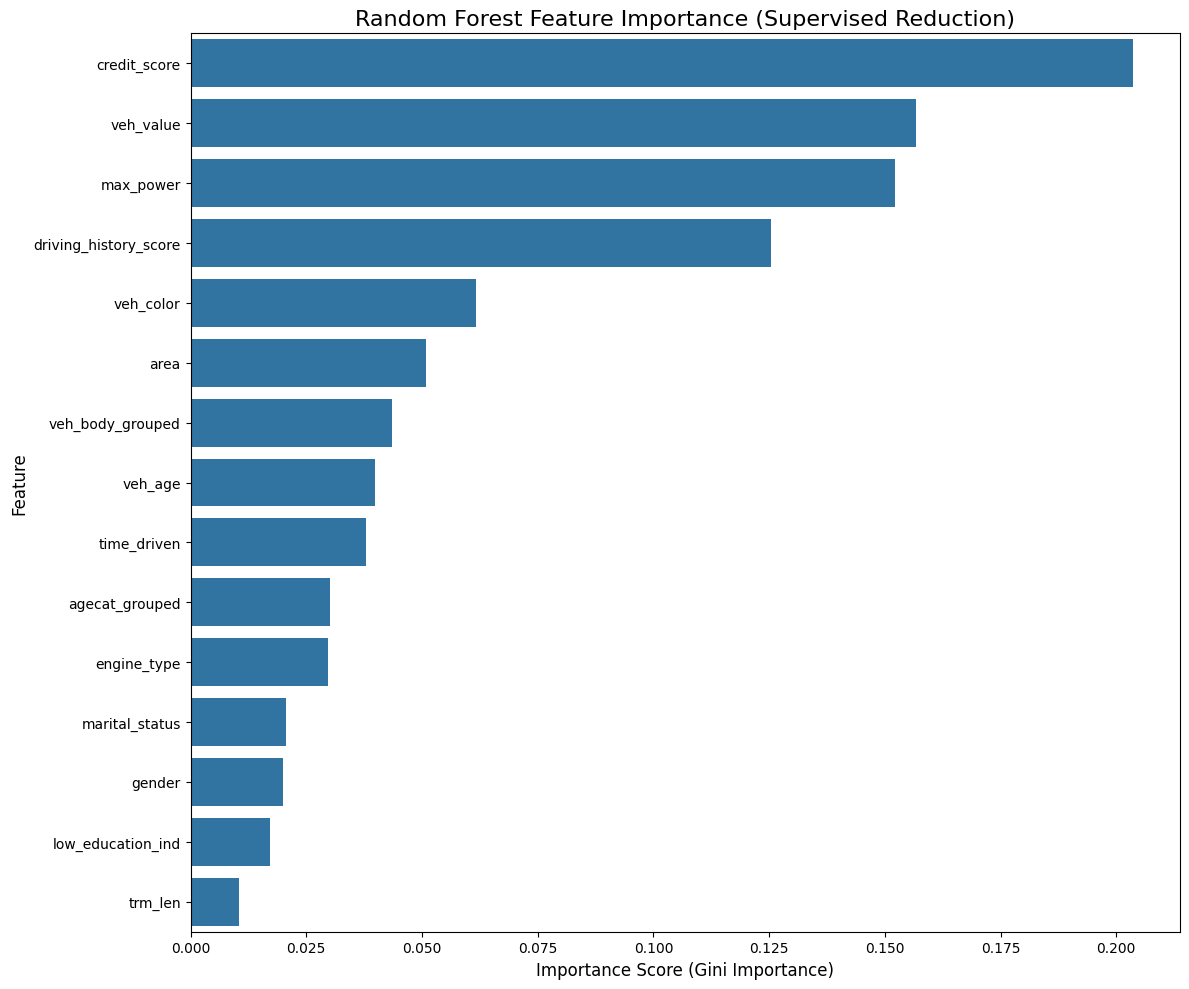

In [150]:
from sklearn.ensemble import RandomForestRegressor

X_rf = train_df_rf[possible_predictors].copy()
y = train_df_rf['claimcst0'].copy()
w = train_df_rf['exposure'].copy()

rf = RandomForestRegressor(
    n_estimators=100,
    n_jobs=-1,
    random_state=42,
    max_features=0.5
)

# Fit the model
rf.fit(X_rf, y, sample_weight=w)

importances = rf.feature_importances_
feature_names = X_rf.columns

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df
)
plt.title('Random Forest Feature Importance (Supervised Reduction)', fontsize=16)
plt.xlabel('Importance Score (Gini Importance)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('rf_feature_importance.png')
plt.show()

In [151]:
preds_after_rf = [
    'driving_history_score',
    'credit_score',
    'low_education_ind',
    'marital_status',
    'time_driven', # probably more important than day of week
    'area',
    # 'agecat', swapped agecat_grouped for this
    'agecat_grouped',
    'gender',
    'veh_color',
    'max_power',
    'engine_type',
    'veh_age',
    # 'veh_body', # encode- coupe, sedan, stnwg, suv, truck, ute, other)
    'veh_body_grouped',
    'veh_value'
    # 'e_bill',
    # 'trm_len', dropped after rf feature importance
    # 'time_of_week_driven'
]

In [152]:
final_columns_to_keep = []
for col_name in X_encoded.columns:
    # Check if the column is a "parent" (e.g., 'veh_value')
    if col_name in preds_after_rf:
        final_columns_to_keep.append(col_name)
    else:
        # Check if the column is a "child" (e.g., 'area_A')
        # We split on '_' (e.g., 'area_A' -> 'area')
        parent_name = col_name.rsplit('_', 1)[0]
        if parent_name in preds_after_rf:
            final_columns_to_keep.append(col_name)

print(f"Found {len(final_columns_to_keep)} encoded columns to keep.")

X_vc = X_encoded[final_columns_to_keep]

Found 37 encoded columns to keep.


In [91]:
X_vc.head()

,driving_history_score,credit_score,max_power,veh_value,low_education_ind_1.0,marital_status_s,time_driven_12pm - 6pm,time_driven_6am - 12pm,time_driven_6pm - 12am,area_b,...,engine_type_petrol,veh_age_2,veh_age_3,veh_age_4,veh_body_grouped_OTHER,veh_body_grouped_SEDAN,veh_body_grouped_STNWG,veh_body_grouped_SUV,veh_body_grouped_TRUCK,veh_body_grouped_UTE
0,73.0,646.516469,161.0,5.80,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,88.0,635.400369,100.0,5.67,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,55.0,646.463131,74.0,5.90,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,98.0,645.598794,121.0,4.79,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,66.0,657.348612,75.0,6.68,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [123]:
from varclushi import VarClusHi

vc = VarClusHi(X_vc)
vc.varclus()

# Report df (sort to see best predictors first)
report = vc.rsquare
report_sorted = report.sort_values(by=['Cluster', 'RS_Ratio'])

print(report_sorted)

    Cluster                Variable    RS_Own     RS_NC  RS_Ratio
0         0               max_power  0.797308  0.118306  0.229889
1         0  veh_body_grouped_SEDAN  0.524602  0.061663  0.506639
2         0  veh_body_grouped_TRUCK  0.417893  0.006556  0.585948
5         1  veh_body_grouped_STNWG  0.714534  0.022538  0.292048
3         1               veh_value  0.525266  0.123915  0.541882
6         1    veh_body_grouped_SUV  0.373351  0.020857  0.639997
4         1      engine_type_petrol  0.114606  0.026010  0.909038
8         2    agecat_grouped_Young  0.832479  0.001120  0.167709
7         2   agecat_grouped_Middle  0.832479  0.006610  0.168636
10        3  time_driven_6am - 12pm  0.834657  0.100301  0.183776
9         3  time_driven_12pm - 6pm  0.834657  0.114962  0.186820
11        4               veh_age_4  0.658698  0.119730  0.387724
12        4               veh_age_2  0.658698  0.144413  0.398910
14        5                  area_d  0.620488  0.012704  0.384395
13        

In [153]:
# Creating final validation datasets
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

df_train = model_data[model_data['sample'] == '1|bld'].copy()

df_train['veh_body_grouped'] = df_train['veh_body'].apply(group_vehicle_body)
df_train['agecat_grouped'] = df_train['agecat'].apply(group_age_category)

X_train_final = df_train[['id'] + preds_after_rf].copy()
y_train_final = df_train[['claimcst0', 'numclaims', 'clm', 'exposure']].copy()

cat_cols = X_train_final.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical features to encode: {cat_cols}")

X_train_final[cat_cols] = encoder.fit_transform(X_train_final[cat_cols])

train_df_final = X_train_final.join(y_train_final)
train_df_final.head()

Categorical features to encode: ['marital_status', 'time_driven', 'area', 'agecat_grouped', 'gender', 'veh_color', 'engine_type', 'veh_body_grouped']


,id,driving_history_score,credit_score,low_education_ind,marital_status,time_driven,area,agecat_grouped,gender,veh_color,max_power,engine_type,veh_age,veh_body_grouped,veh_value,claimcst0,numclaims,clm,exposure
0,1,73.0,646.516469,0.0,0.0,1.0,1.0,2.0,0.0,0.0,161,2.0,2,4.0,5.80,2023.198184,1,1,0.362191
1,2,88.0,635.400369,0.0,1.0,2.0,0.0,1.0,0.0,4.0,100,0.0,4,3.0,5.67,3600.172234,1,1,0.632068
2,3,55.0,646.463131,0.0,0.0,2.0,2.0,1.0,0.0,3.0,74,3.0,2,2.0,5.90,2021.144067,1,1,0.367460
3,4,98.0,645.598794,0.0,0.0,3.0,1.0,1.0,1.0,0.0,121,0.0,3,3.0,4.79,4006.845492,1,1,0.802184
4,5,66.0,657.348612,0.0,1.0,2.0,2.0,2.0,1.0,1.0,75,3.0,3,2.0,6.68,2542.953931,1,1,0.485009


In [154]:
# Creating final validation datasets
from sklearn.preprocessing import OrdinalEncoder

df_val = model_data[model_data['sample'] == '2|val'].copy()

df_val['veh_body_grouped'] = df_val['veh_body'].apply(group_vehicle_body)
df_val['agecat_grouped'] = df_val['agecat'].apply(group_age_category)

X_val_final = df_val[['id'] + preds_after_rf].copy()
y_val_final = df_val[['claimcst0', 'numclaims', 'clm', 'exposure']].copy()

cat_cols = X_val_final.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical features to encode: {cat_cols}")

X_val_final[cat_cols] = encoder.fit_transform(X_val_final[cat_cols])

val_df_final = X_val_final.join(y_val_final)
val_df_final.head()

Categorical features to encode: ['marital_status', 'time_driven', 'area', 'agecat_grouped', 'gender', 'veh_color', 'engine_type', 'veh_body_grouped']


,id,driving_history_score,credit_score,low_education_ind,marital_status,time_driven,area,agecat_grouped,gender,veh_color,max_power,engine_type,veh_age,veh_body_grouped,veh_value,claimcst0,numclaims,clm,exposure
9,10,74.0,648.136355,0.0,0.0,1.0,1.0,1.0,0.0,1.0,267,0.0,4,5.0,6.49,3906.881054,1,1,0.746884
13,14,59.0,654.686205,0.0,1.0,2.0,3.0,1.0,1.0,1.0,129,1.0,3,2.0,6.56,4260.552605,1,1,0.848036
14,15,62.0,642.842943,0.0,0.0,2.0,2.0,2.0,1.0,3.0,122,3.0,2,2.0,6.09,2056.330796,1,1,0.356544
18,19,83.0,655.733899,0.0,1.0,2.0,1.0,1.0,1.0,1.0,115,3.0,4,2.0,7.13,4756.658716,1,1,0.896206
24,25,63.0,642.523923,0.0,1.0,1.0,0.0,1.0,1.0,3.0,183,3.0,3,4.0,6.37,2347.028119,1,1,0.401096


In [155]:
inf_df = pd.read_csv('../backend/inference_data_cleaned.csv')

In [156]:
predictors = [
    'driving_history_score',
    'credit_score',
    'low_education_ind',
    'marital_status',
    'time_driven',
    'area',
    'agecat_grouped',
    'gender',
    'veh_color',
    'max_power',
    'engine_type',
    'veh_age',
    'veh_body_grouped',
    'veh_value'
]

In [157]:
from sklearn.preprocessing import OrdinalEncoder

inf_df['veh_body_grouped'] = inf_df['veh_body'].apply(group_vehicle_body)
inf_df['agecat_grouped'] = inf_df['agecat'].apply(group_age_category)

X = inf_df[['id'] + predictors].copy()
y = inf_df[['exposure']].copy()

cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical features to encode: {cat_cols}")

X[cat_cols] = encoder.fit_transform(X[cat_cols])

inf_df_final = X.join(y)
inf_df_final.head()

Categorical features to encode: ['marital_status', 'time_driven', 'area', 'agecat_grouped', 'gender', 'veh_color', 'engine_type', 'veh_body_grouped']


,id,driving_history_score,credit_score,low_education_ind,marital_status,time_driven,area,agecat_grouped,gender,veh_color,max_power,engine_type,veh_age,veh_body_grouped,veh_value,exposure
0,8295,81,644.721808,0,1.0,2.0,0.0,1.0,1.0,6.0,128,2.0,3,4.0,6.36,0.777085
1,17625,94,634.306196,0,1.0,1.0,0.0,2.0,0.0,7.0,178,0.0,1,3.0,2.56,0.528369
2,3802,77,649.245139,0,0.0,3.0,3.0,1.0,0.0,8.0,270,3.0,4,1.0,6.18,0.384591
3,12865,59,647.594655,0,1.0,2.0,3.0,1.0,1.0,3.0,120,3.0,3,4.0,6.49,0.116378
4,6495,81,657.550500,0,1.0,2.0,2.0,1.0,0.0,4.0,94,3.0,2,2.0,6.46,0.688417


In [158]:
encoding_map = {}

for col_name, categories in zip(cat_cols, encoder.categories_):
    mapping = {category: code for code, category in enumerate(categories)}
    encoding_map[col_name] = mapping

encoding_map


{'marital_status': {'M': 0, 'S': 1},
 'time_driven': {'12am - 6 am': 0,
  '12pm - 6pm': 1,
  '6am - 12pm': 2,
  '6pm - 12am': 3},
 'area': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5},
 'agecat_grouped': {'Elder': 0, 'Middle': 1, 'Young': 2},
 'gender': {'F': 0, 'M': 1},
 'veh_color': {'black': 0,
  'blue': 1,
  'brown': 2,
  'gray': 3,
  'green': 4,
  'red': 5,
  'silver': 6,
  'white': 7,
  'yellow': 8},
 'engine_type': {'dissel': 0, 'electric': 1, 'hybrid': 2, 'petrol': 3},
 'veh_body_grouped': {'COUPE': 0,
  'OTHER': 1,
  'SEDAN': 2,
  'STNWG': 3,
  'SUV': 4,
  'TRUCK': 5,
  'UTE': 6}}

## Save Altered Data

In [100]:
model_data.to_csv('../backend/model_data.csv', index=False)
inference_data.to_csv('../backend/inference_data.csv', index=False)

In [159]:
train_df_final.to_csv('../backend/train_df_final.csv', index=False)
val_df_final.to_csv('../backend/val_df_final.csv', index=False)

In [161]:
inf_df_final.to_csv('../backend/inf_df_final.csv', index=False)